## Exploratory Data Analysis - Netflix, Hulu, Disney+, Amazon Movies & Shows Ratings

    Github - https://github.com/hariomvyas/UMBC/

#### Data Source 1 – 

    Data Source - https://www.kaggle.com/shivamb/netflix-shows
    Data Name – Netflix Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (8807), Columns (12), Size (3.24 MB)

    
#### Data Source 2 –

    Data Source - https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows
    Data Name – Amazon Prime Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (9668), Columns (12), Size (3.78 MB)
    
#### Data Source 3 –

    Data Source – https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
    Name – Disney+ Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (1450), Columns (12), Size (374 KB)


#### Data Source 4 –

    Data Source – https://www.kaggle.com/shivamb/hulu-movies-and-tv-shows
    Name – Hulu Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (3073), Columns (12), Size (1.05 MB)


#### Columns Information
    1.  show_id - Show ID
    2.  type - Is it a Movie or TV Show
    3.  title - Title/Name of Movie or TV Show
    4.  director - Director of the Movie or TV Show
    5.  Cast - List of Cast in Movie or TV Show
    6.  country - Origin Country
    7.  date_added - Date when it was added on platform
    8.  release_year - When it was released
    9.  rating - Ratings of Movie or TV Show
    10. duration   Duration of Movie or TV Show
    11. description - Description of Movie or TV Show
    12. Category - Category of Movie or TV Show

#### Breakdown of the project – 

    1. Loading dataset, Combining two datasets, and Cleaning.
    2. Finding relationship between features of dataset
    3. Creating visulization based on found relationships

In [1]:
## Importing Libraries

import time
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#https://github.com/ResidentMario/missingno
import missingno as msno

In [2]:
## Importing data of Netflix, Hulu, Amazon Prime, and Disney Plus as dataframe.

start_time = time.time()
netflix_df = pd.read_csv("netflix_titles.csv")
hulu_df = pd.read_csv("hulu_titles.csv")
amazon_df = pd.read_csv("amazon_prime_titles.csv")
disney_df = pd.read_csv("disney_plus_titles.csv")
print(time.time() - start_time,'seconds')
print(netflix_df.shape)
print(hulu_df.shape)
print(amazon_df.shape)
print(disney_df.shape)

0.11997485160827637 seconds
(8807, 12)
(3073, 12)
(9668, 12)
(1450, 12)


In [3]:
## Looking their columns

print(netflix_df.columns)
print(hulu_df.columns)
print(amazon_df.columns)
print(disney_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
## Printing how many null values are present in each columns of each dataframes

print(netflix_df.isnull().sum(),"\n")
print(hulu_df.isnull().sum(),"\n")
print(amazon_df.isnull().sum(),"\n")
print(disney_df.isnull().sum(),"\n")

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64 

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64 

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64 

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0

In [5]:
## Netflix Dataframe

netflix_df['service'] = 'Netflix'

netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix


In [6]:
## Hulu Dataframe

hulu_df['service'] = 'Hulu'

hulu_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,Hulu
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",Hulu
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,Hulu
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...,Hulu
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...,Hulu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu


In [7]:
## Disney Plus Dataframe

disney_df['service'] = 'Disney Plus'

disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney Plus
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney Plus
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney Plus
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney Plus
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney Plus
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney Plus
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney Plus
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney Plus


In [8]:
## Amazon Prime Dataframe

amazon_df['service'] = 'Amazon Prime'

amazon_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [9]:
## Merging All Dataframes into single one

frames = [netflix_df, hulu_df, disney_df, amazon_df]
final_df = pd.concat(frames)
final_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


# Data - Untidy -> Tidy

In [10]:
## ID Variables of Final Dataframe1

id_vars1 = [
    'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
    'release_year', 'rating', 'duration', 'listed_in', 'description', 'service'
]

In [11]:
## Split Final Cast Column and adding them back to new dataframe

final_df_cast_expanded = final_df['cast'].str.split(',', expand=True)
final_df_cast_expanded.columns = ['C'+str(i) for i in final_df_cast_expanded.columns]

## Concating old Final Dataframe & Expanded Cast dataframe
concated_final_df = pd.concat([final_df, final_df_cast_expanded], axis = 1)

final_df1 = pd.melt(concated_final_df, id_vars1, value_vars=final_df_cast_expanded.columns, var_name='Cast Number', value_name='Cast')

## Dropping Extra 'cast' Columns
final_df1.drop(final_df1.columns[[4,13]], axis = 1, inplace=True)

In [12]:
## Final Dataframe after extending cast column

final_df1

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,service,Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,NaN
4,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747843,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime,None
1747844,s9665,TV Show,Planet Patrol,NaN,NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,None
1747845,s9666,Movie,Outpost,Steve Barker,NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,None
1747846,s9667,TV Show,Maradona: Blessed Dream,NaN,NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime,None


In [13]:
## ID Variables of Final Dataframe2

id_vars2 = [
    'show_id', 'type', 'title', 'director', 'Cast', 'country', 'date_added',
    'release_year', 'rating', 'duration', 'listed_in', 'description', 'service'
]

In [14]:
## Split Final Listed In Column

final_df_listed_expanded = final_df1['listed_in'].str.split(',', expand =True)
final_df_listed_expanded.columns = ['L'+str(i) for i in final_df_listed_expanded.columns]

## Concating old Final Dataframe & Expanded Listed dataframe
concated_final_df = pd.concat([final_df1, final_df_listed_expanded], axis = 1)

final_df2 = pd.melt(concated_final_df, id_vars2, value_vars=final_df_listed_expanded.columns, var_name='Listing Number', value_name='Category')

## Dropping Extra 'listed_in' Columns
final_df2.drop(final_df2.columns[[10,13]], axis = 1, inplace=True)

In [15]:
## Final Dataframe after extending Category column

final_df2

,show_id,type,title,director,Cast,country,date_added,release_year,rating,duration,description,service,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Netflix,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Netflix,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Netflix,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Netflix,Docuseries
4,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,Netflix,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739235,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,None,NaN,NaN,1940,7+,60 min,New York City street principles get an East Si...,Amazon Prime,None
8739236,s9665,TV Show,Planet Patrol,NaN,None,NaN,NaN,2018,13+,4 Seasons,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,None
8739237,s9666,Movie,Outpost,Steve Barker,None,NaN,NaN,2008,R,90 min,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,None
8739238,s9667,TV Show,Maradona: Blessed Dream,NaN,None,NaN,NaN,2021,TV-MA,1 Season,"The series tells the story of Diego Maradona, ...",Amazon Prime,None


In [16]:
## Converting to needed datatypes 
final_df2['date_added'] = final_df2['date_added'].str.replace(' ', '') # Removing extra spaces for format

# Changing to datetime datatype
final_df2['date_added'] = pd.to_datetime(final_df2['date_added'], format='%B%d,%Y')

final_df2 = final_df2.astype({"show_id":'category', "type":'category', "title":'category', "director":'category', "Cast":'category', "country":'category', "release_year":'category', "rating":'category', "duration":'category', "description":'category', "Category":'category'})

In [17]:
## Looking for new columns and rows

final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739240 entries, 0 to 8739239
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   show_id       category      
 1   type          category      
 2   title         category      
 3   director      category      
 4   Cast          category      
 5   country       category      
 6   date_added    datetime64[ns]
 7   release_year  category      
 8   rating        category      
 9   duration      category      
 10  description   category      
 11  service       object        
 12  Category      category      
dtypes: category(11), datetime64[ns](1), object(1)
memory usage: 313.0+ MB


### Type
    There are two types in Type column - Movie & TV Show

In [18]:
## Row counts of each type

pd.DataFrame(final_df.groupby('service').type.value_counts())

type
service      type         
Amazon Prime Movie    7814
             TV Show  1854
Disney Plus  Movie    1052
             TV Show   398
Hulu         TV Show  1589
             Movie    1484
Netflix      Movie    6131
             TV Show  2676

In [19]:
## Percentage of data in type column

byservice = pd.DataFrame(final_df.groupby('service').type.value_counts(normalize=True))

<AxesSubplot:xlabel='service'>

<Figure size 1440x720 with 0 Axes>

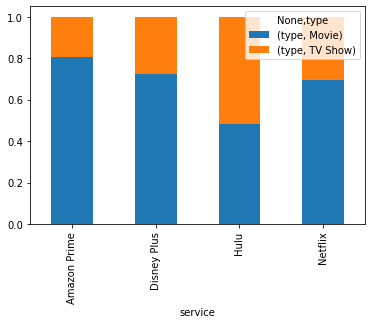

In [20]:
## Type - Movie v/s TV Show

plt.figure(figsize=(20,10))
byservice.unstack().plot(kind='bar', stacked=True)

### Director
    Director Column Analysis.

In [21]:
## Count of Movies & TV Shows under each director by Netflix

netflix_directors = pd.DataFrame(netflix_df.director.value_counts())
netflix_directors

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1
Will Eisenberg,1


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

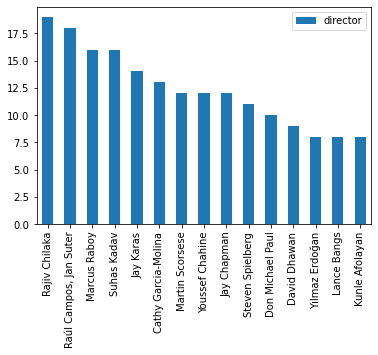

In [22]:
## Bar graph showing Netflix top 15 Directors & their work count

plt.figure(figsize=(30,20))
netflix_directors.head(15).plot(kind='bar')

In [23]:
## Count of Movies & TV Shows under each director by Amazon Prime

amazon_directors = pd.DataFrame(amazon_df.director.value_counts())
amazon_directors

,director
Mark Knight,113
Cannis Holder,61
Moonbug Entertainment,37
Jay Chapman,34
Arthur van Merwijk,30
...,...
Andrew Traucki,1
Karyn Kusama,1
K. Subash,1
Robert Cuffley,1


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

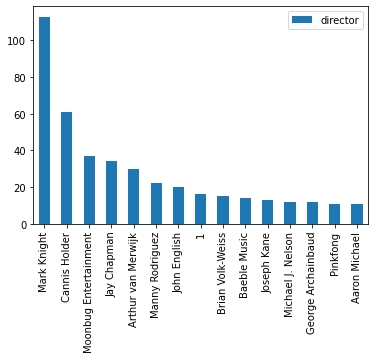

In [24]:
## Bar graph showing Amazon Prime top 15 Directors & their work count

plt.figure(figsize=(30,20))
amazon_directors.head(15).plot(kind='bar')

In [25]:
## Count of Movies & TV Shows under each director by Hulu

hulu_directors = pd.DataFrame(hulu_df.director.value_counts())
hulu_directors

,director
"Director Jennifer Kent (""The Babadook"") tells the sweeping tale of a young woman's quest for revenge set in 1825 against the perilous and unforgiving terrain of Tasmania.",1
"Director Gigi Saul Guerrero talks through Culture Shock’s themes – immigration, filmmaking, and latinidad – in this one-on-one chat.",1
"Director Alex Winter goes inside the biggest global corruption scandal in history that was uncovered by hundreds of journalists, working in secret and at enormous risk.",1


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

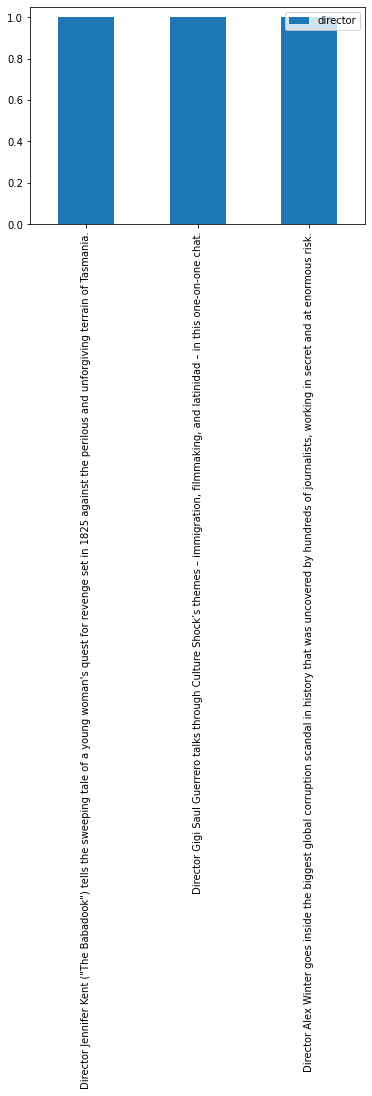

In [26]:
## Bar graph showing Hulu top 15 Directors & their work count

plt.figure(figsize=(30,20))
hulu_directors.head(15).plot(kind='bar')

#### Hulu has no Director Data in its column

In [27]:
## Count of Movies & TV Shows under each director Disney Plus

disney_directors = pd.DataFrame(disney_df.director.value_counts())
disney_directors

,director
Jack Hannah,17
John Lasseter,16
Paul Hoen,16
Robert Stevenson,12
Charles Nichols,12
...,...
Simon Wells,1
David Lynch,1
Don Bluth,1
Milt Schaffer,1


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

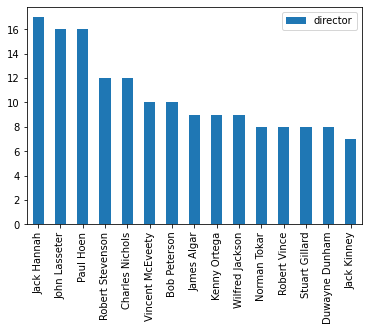

In [28]:
## Bar graph showing Disney Plus top 15 Directors & their work count

plt.figure(figsize=(30,20))
disney_directors.head(15).plot(kind='bar')

In [29]:
## Count of Movies & TV Shows under each director across all services

all_directors = pd.DataFrame(final_df.director.value_counts())
all_directors

,director
Mark Knight,113
Cannis Holder,61
Jay Chapman,46
Moonbug Entertainment,37
Arthur van Merwijk,30
...,...
Steve McLean,1
Gabe Klinger,1
Jean-Simon Chartier,1
"Daniel Mann, Joseph Sargent",1


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

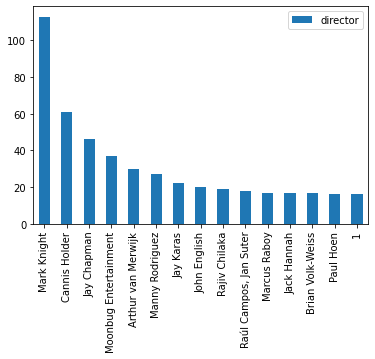

In [30]:
## Bar graph showing  top 15 Directors & their work count across all services

plt.figure(figsize=(30,20))
all_directors.head(15).plot(kind='bar')

### Cast
    Cast column Analysis.

In [31]:
## Count of movies & tv shows by  by Actor & Actresses

byservice= pd.DataFrame(final_df2.groupby('service').Cast.value_counts())
byservice

Cast
service                          
Amazon Prime Maggie Binkley   280
             1                175
             Gene Autry       160
              Nassar          150
              Champion        145
...                           ...
Netflix       Lois January      0
              Lois Okoli        0
              Lois Verner       0
              Lois Wilde        0
             英司 花輪              0

[271892 rows x 1 columns]

In [32]:
## Unstacking Service-Cast Dataframe

byservice.unstack().T.sort_values(['Amazon Prime', 'Disney Plus', 'Hulu', 'Netflix'], ascending=False).head(15)

service                                  Amazon Prime  Disney Plus  Hulu  \
Cast Maggie Binkley                               280            0     0   
     1                                            175            0     0   
     Gene Autry                                   160            0     0   
      Nassar                                      150            0     0   
      Champion                                    145            0     0   
     Anne-Marie Newland                           125            0     0   
     Roy Rogers                                   115            5     0   
      Prakash Raj                                 115            0     0   
     Cassandra Peterson                           110            0     0   
     John Wayne                                   105            0     0   
      Michael Madsen                               90            0     0   
       Ph.D.                                       90            0     0   
      Anjali                                       85            0     0   
      Erin Webbs                                   85            0     0   
      Mystery Science Theater 3000 Guys            85            0     0   

service                                  Netflix  
Cast Maggie Binkley                            0  
     1                                         0  
     Gene Autry                                0  
      Nassar                                  65  
      Champion                                 0  
     Anne-Marie Newland                        0  
     Roy Rogers                                0  
      Prakash Raj                             45  
     Cassandra Peterson                        0  
     John Wayne                                5  
      Michael Madsen                          55  
       Ph.D.                                   0  
      Anjali                                  25  
      Erin Webbs                               0  
      Mystery Science Theater 3000 Guys        0

<AxesSubplot:>

<Figure size 5040x3600 with 0 Axes>

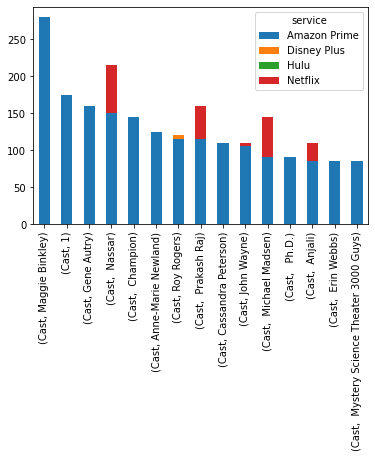

In [33]:
## Bargraph showing Service-cast Dataframe

plt.figure(figsize=(70,50))
byservice.unstack().T.sort_values(['Amazon Prime', 'Disney Plus', 'Hulu', 'Netflix'], ascending=False).head(15).plot(kind='bar', stacked=True)

### Country
    Country column Analysis.

In [34]:
## Count of movies & tv shows by Country

byservice= pd.DataFrame(final_df.groupby('service').country.value_counts())
byservice

country
service      country                               
Amazon Prime United States                      253
             India                              229
             United Kingdom                      28
             Canada                              16
             United Kingdom, United States       12
...                                             ...
Netflix      Uruguay, Spain, Mexico               1
             Venezuela                            1
             Venezuela, Colombia                  1
             West Germany                         1
             Zimbabwe                             1

[1073 rows x 1 columns]

<AxesSubplot:ylabel='country'>

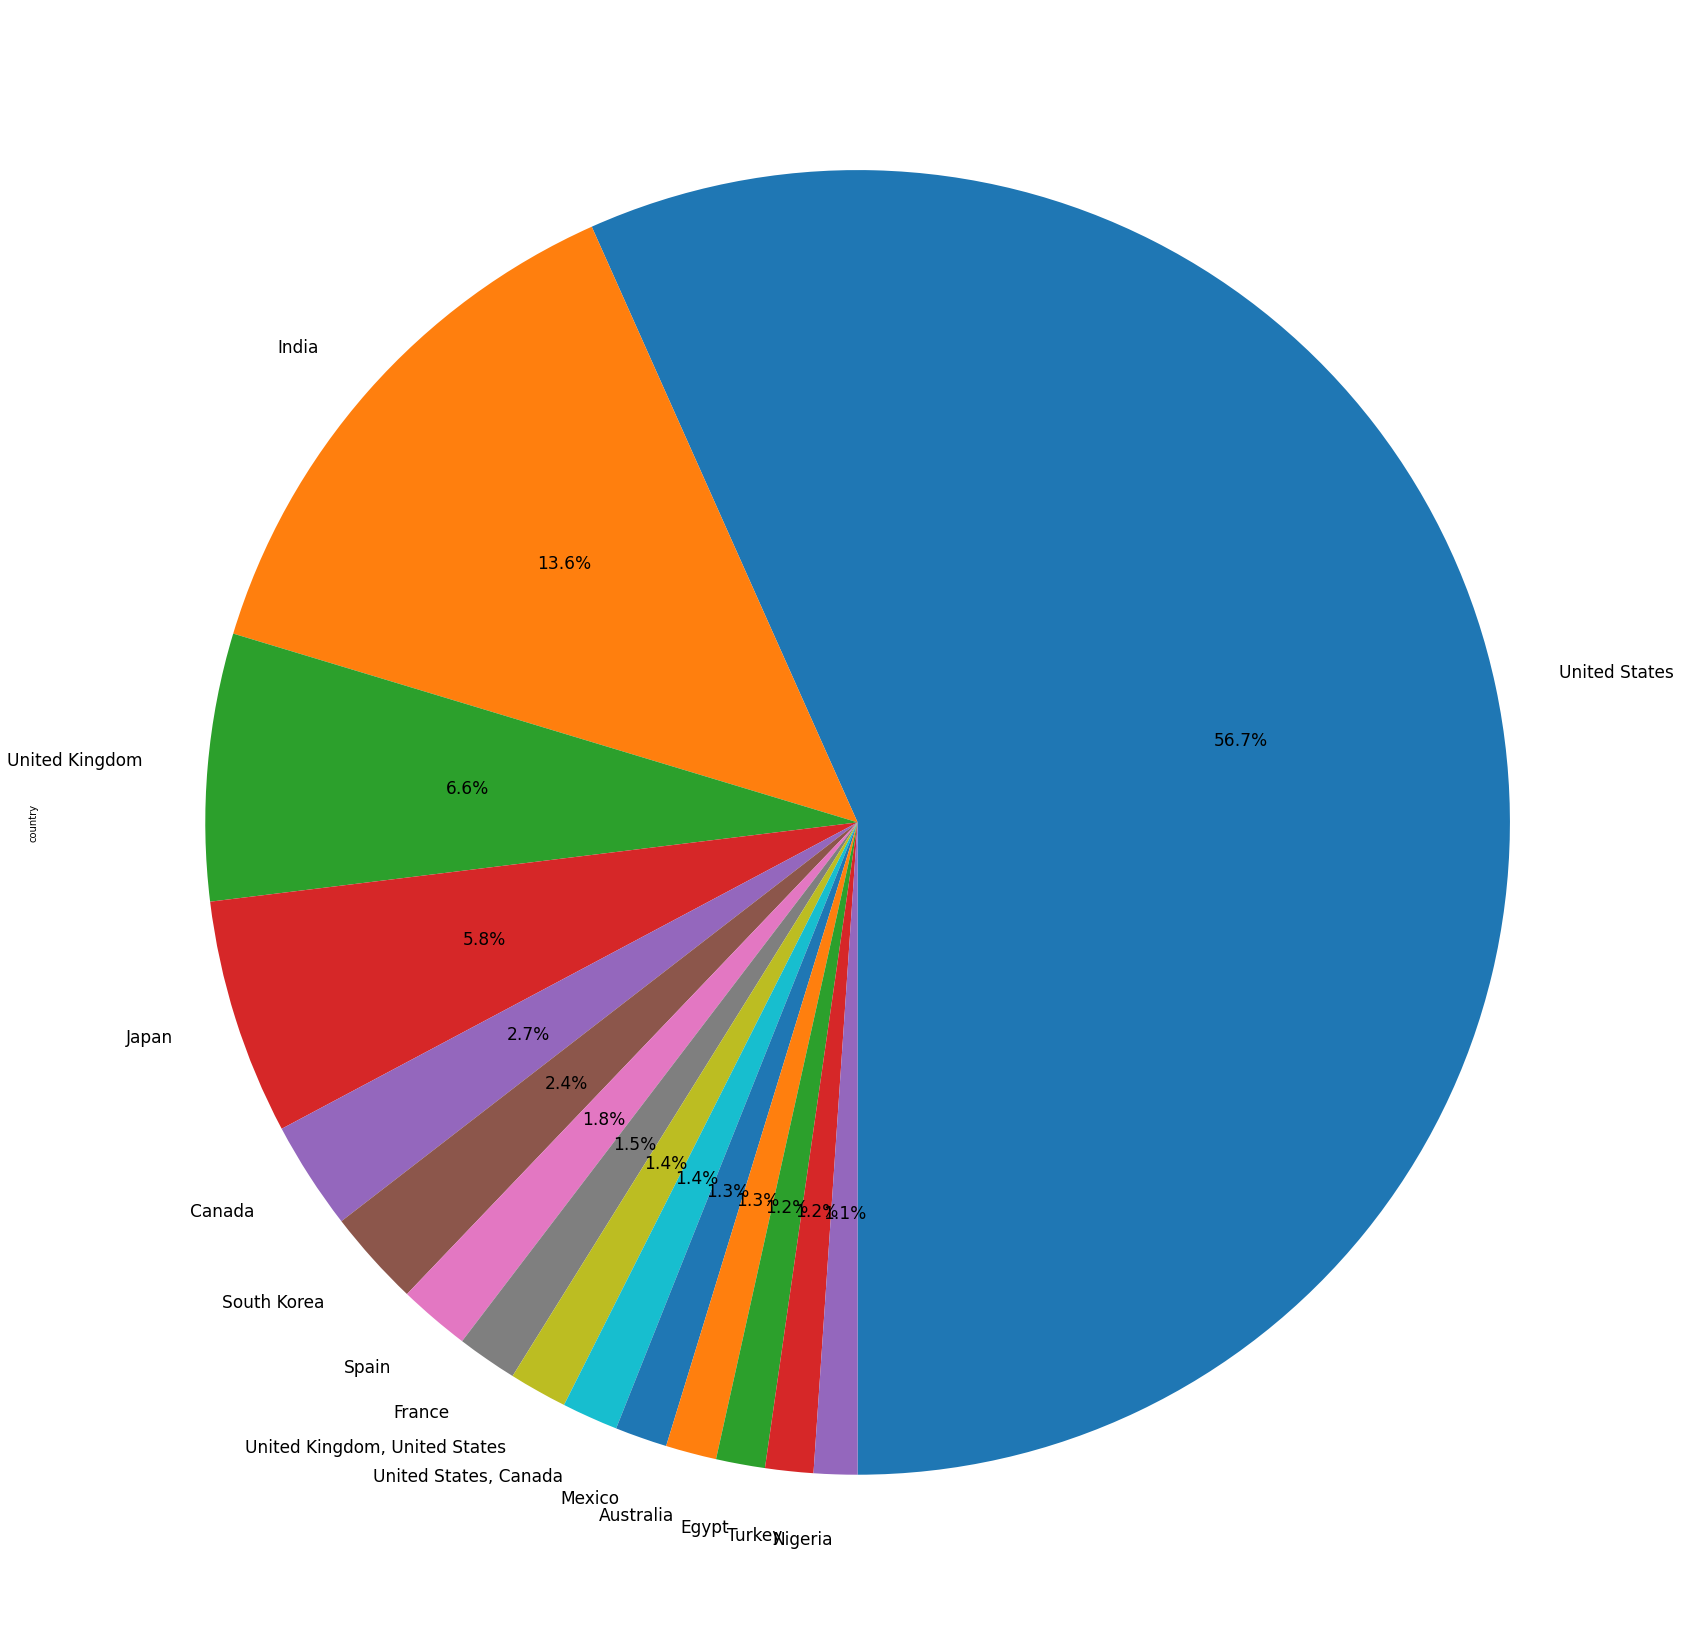

In [35]:
## Pie-Chart showing top 15 Countries and count of Movies & TV Shows from there

plt.figure(figsize=(30,30))
final_df.country.value_counts().head(15).plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

# Fun Facts

### September 7, 2006

Launched on September 7, 2006, as Amazon Unbox in the United States, the service grew with an expanding library, and added the Prime Video membership upon the development of the Prime subscription. It was then renamed as Amazon Instant Video on Demand.

### 2007

In 2007 Netflix began offering subscribers the option to stream some of its movies and television shows directly to their homes through the Internet. For most subscription plans, the streaming service was unlimited.

Hulu, Internet streaming service, launched in 2007, that provides advertiser-supported videos of television shows and films. Access is limited to viewers in the United States because of international licensing restrictions.

### November 12, 2019

Production of films and television shows for exclusive release on the platform began in late 2017. Disney+ was launched on November 12, 2019, in the United States, Canada, and the Netherlands, and expanded to Australia, New Zealand, and Puerto Rico a week later.

### Date Added
    Date Added column Analysis.

In [36]:
## Analyzing Netflix's Content Added Date and count of movies & tv shows added in them.

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_dateadded = pd.DataFrame(netflix_df.date_added.value_counts().sort_index())
netflix_dateadded

,date_added
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2
2021-09-24,10


In [37]:
## Analyzing Hulu's Content Added Date and count of movies & tv shows added in them.

hulu_df['date_added'] = pd.to_datetime(hulu_df['date_added'])
hulu_dateadded = pd.DataFrame(hulu_df.date_added.value_counts().sort_index())
hulu_dateadded

,date_added
2006-07-14,1
2008-06-01,1
2008-07-01,1
2009-02-10,1
2009-08-14,1
...,...
2021-10-20,2
2021-10-21,2
2021-10-22,3
2021-10-23,2


In [38]:
## Analyzing Amazon's Content Added Date and count of movies & tv shows added in them.

amazon_df['date_added'] = pd.to_datetime(amazon_df['date_added'])
amazon_dateadded = pd.DataFrame(amazon_df.date_added.value_counts().sort_index())
amazon_dateadded

,date_added
2021-03-30,14
2021-04-01,3
2021-04-04,1
2021-04-10,1
2021-04-13,1
...,...
2021-10-05,1
2021-10-06,1
2021-10-07,2
2021-10-08,3


In [39]:
## Analyzing Disney's Content Added Date and count of movies & tv shows added in them.

disney_df['date_added'] = pd.to_datetime(disney_df['date_added'])
disney_dateadded = pd.DataFrame(disney_df.date_added.value_counts().sort_index())
disney_dateadded

,date_added
2019-10-01,10
2019-11-12,722
2019-11-15,1
2019-11-18,1
2019-11-20,1
...,...
2021-11-17,1
2021-11-19,4
2021-11-24,4
2021-11-25,1


### Release Year
    Release Year column Analysis.

In [40]:
## Analyzing Content Release Year with count of movies & tv shows released in them.

pd.DataFrame(final_df.release_year.value_counts().sort_index())

,release_year
1920,3
1922,2
1923,2
1924,1
1925,9
...,...
2017,1892
2018,2105
2019,2470
2020,2406


In [41]:
## Lets find Movies from year 1920

final_df.loc[final_df['release_year'] == 1920]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
83,s84,Movie,Within Our Gates,Oscar Micheaux,"Evelyn Preer, Flo Clements",NaN,NaN,1920,13+,78 min,Drama,"Abandoned by her fiance, an educated negro wom...",Amazon Prime
1284,s1285,Movie,Pollyanna,Paul Powell,"Mary Pickford, Wharton James, Katherine Griffi...",NaN,NaN,1920,NR,60 min,"Comedy, Drama, Kids","When Pollyanna is orphaned, she is sent to liv...",Amazon Prime
1474,s1475,Movie,Nomads Of The North,David Hartford,"Betty Blythe, Lon Chaney",NaN,NaN,1920,13+,78 min,Drama,A Canadian Mountie allows an innocent fugitive...,Amazon Prime


##### Within Our Gates
    https://www.imdb.com/title/tt0011870/
##### Pollyanna
    https://www.imdb.com/title/tt0054195/ (Originally released in 1960) - Shows errors in data.
##### Nomads Of The North
    https://www.imdb.com/title/tt0011513/

<AxesSubplot:>

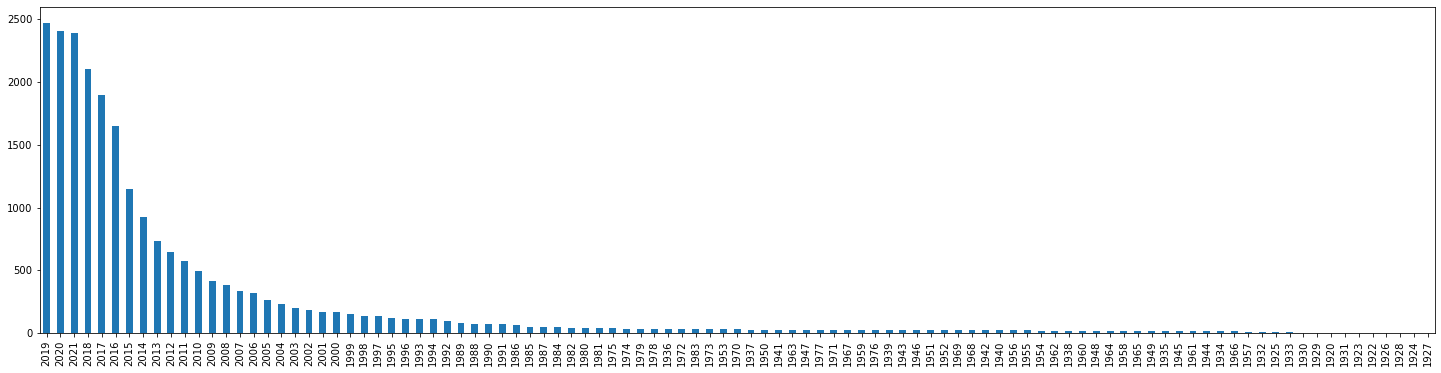

In [42]:
## Bargraph showing Years and count of Movies & TV Shows released in them

plt.figure(figsize=(25,6))
final_df.release_year.value_counts().plot(kind='bar')

### Ratings

##### TV Ratings:

    TV-Y: All Children
    TV-Y7: Directed to Older Children
    TV-Y7 FV: Directed to Older Children - Fantasy Violence
    TV-G: General Audience
    TV-PG: Parent Guidance Suggested
    TV-14: Parents Strongly Cautioned
    TV-MA: Mature Audience Only
    Unrated: Its not rated
    
##### Movie Ratings:

    G: General Audience
    PG: Parental Guidance Suggested
    PG-13: Parents Strongly Cautioned
    R: Restricted
    NC-17: Clearly Adult
    Unrated: Its not rated

In [43]:
## Ratings & Counts of movies & tv shows on Netflix

netflix_ratings = netflix_df.rating.value_counts()
netflix_ratings

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

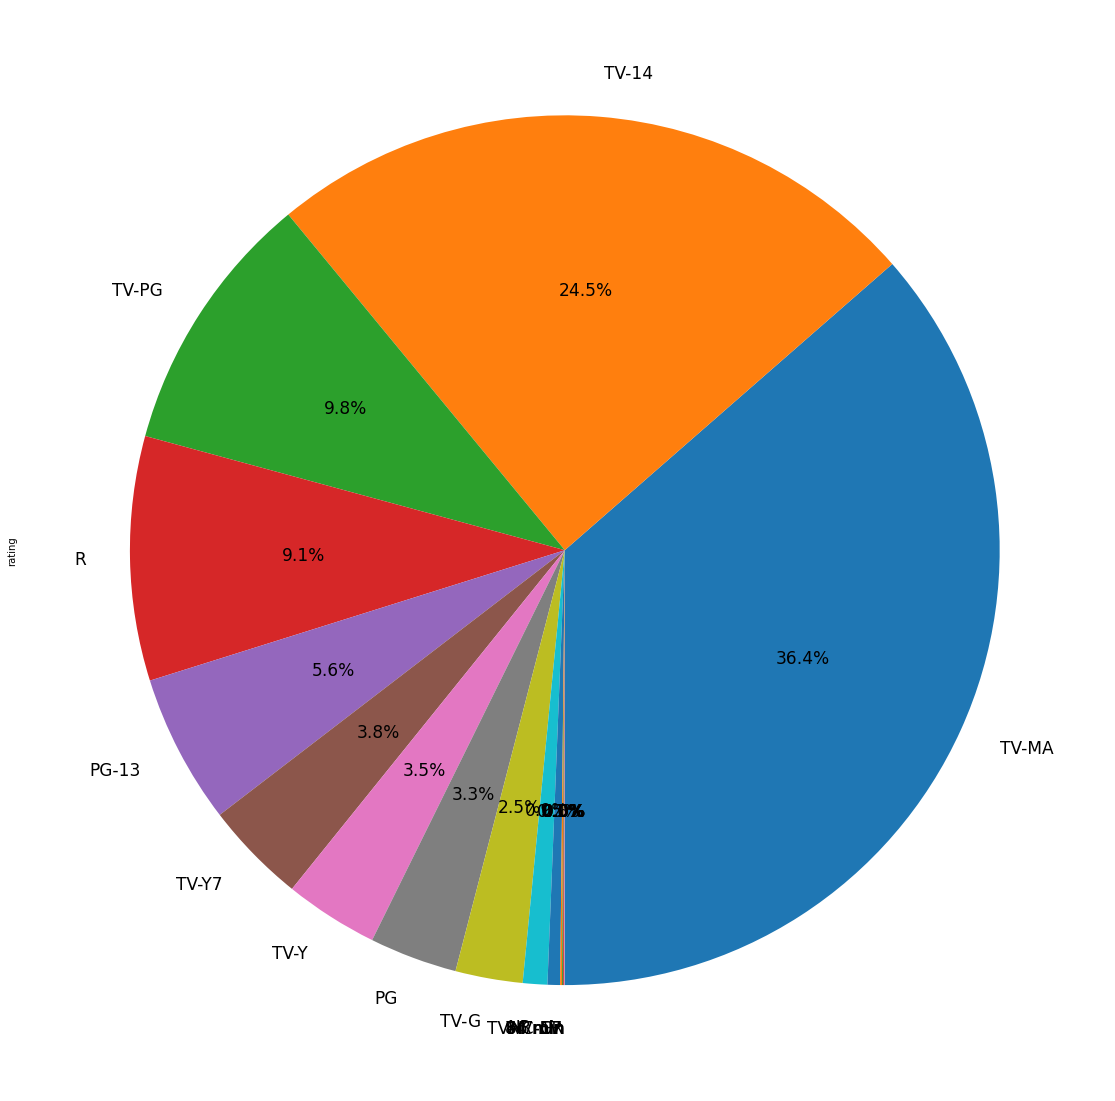

In [44]:
## Pie chart showing Netflix ratings

plt.figure(figsize=(20,20))
netflix_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

In [45]:
## Ratings & Counts of movies & tv shows on Amazon

amazon_ratings = amazon_df.rating.value_counts()
amazon_ratings

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

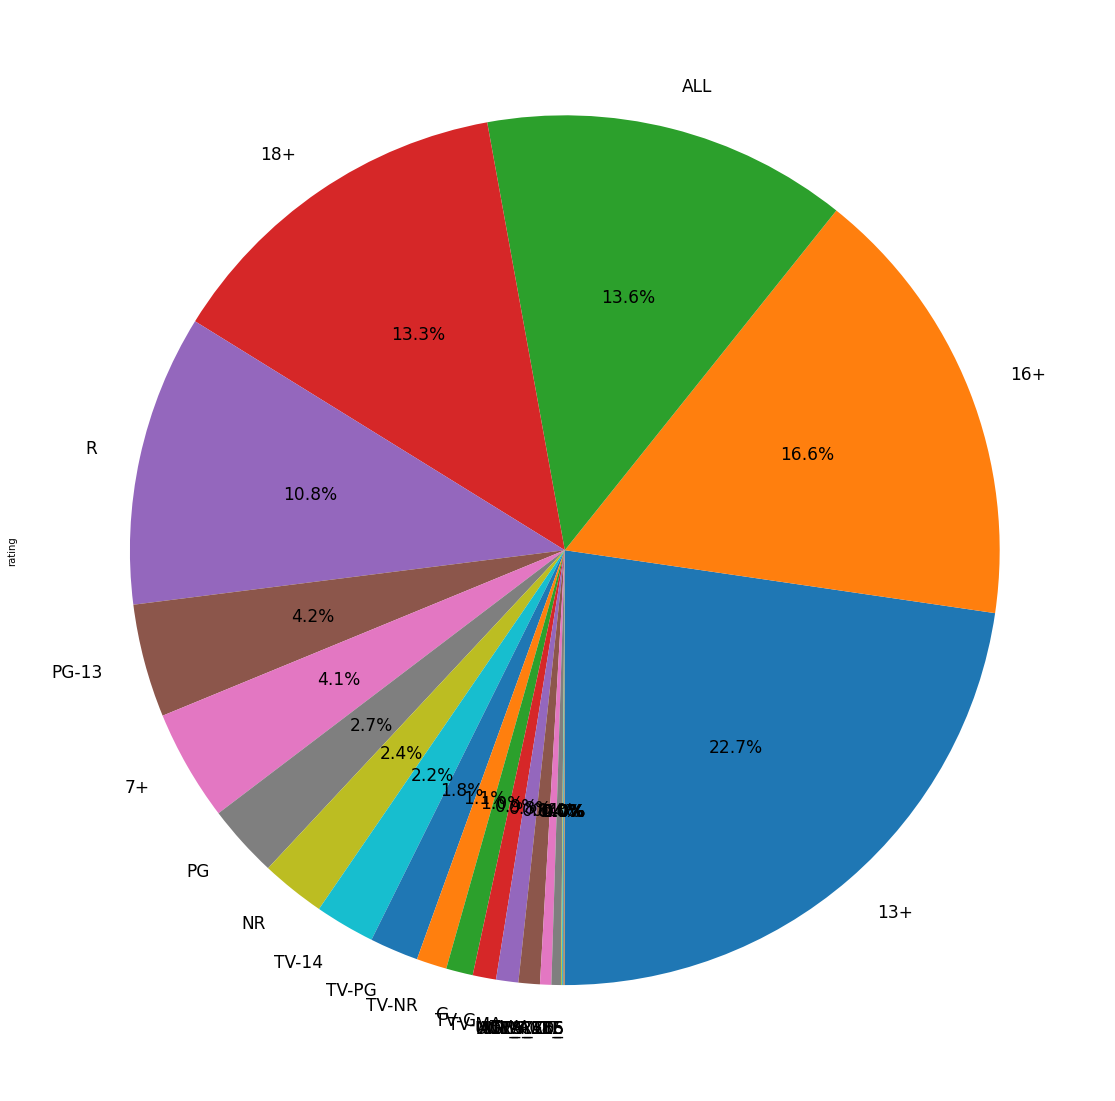

In [46]:
## Pie chart showing Amazon ratings

plt.figure(figsize=(20,20))
amazon_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

In [47]:
## Ratings & Counts of movies & tv shows on Hulu

hulu_ratings = hulu_df.rating.value_counts()
hulu_ratings

TV-14     691
TV-MA     391
R         345
TV-PG     321
PG-13     163
         ... 
34 min      1
47 min      1
65 min      1
37 min      1
71 min      1
Name: rating, Length: 88, dtype: int64

<AxesSubplot:ylabel='rating'>

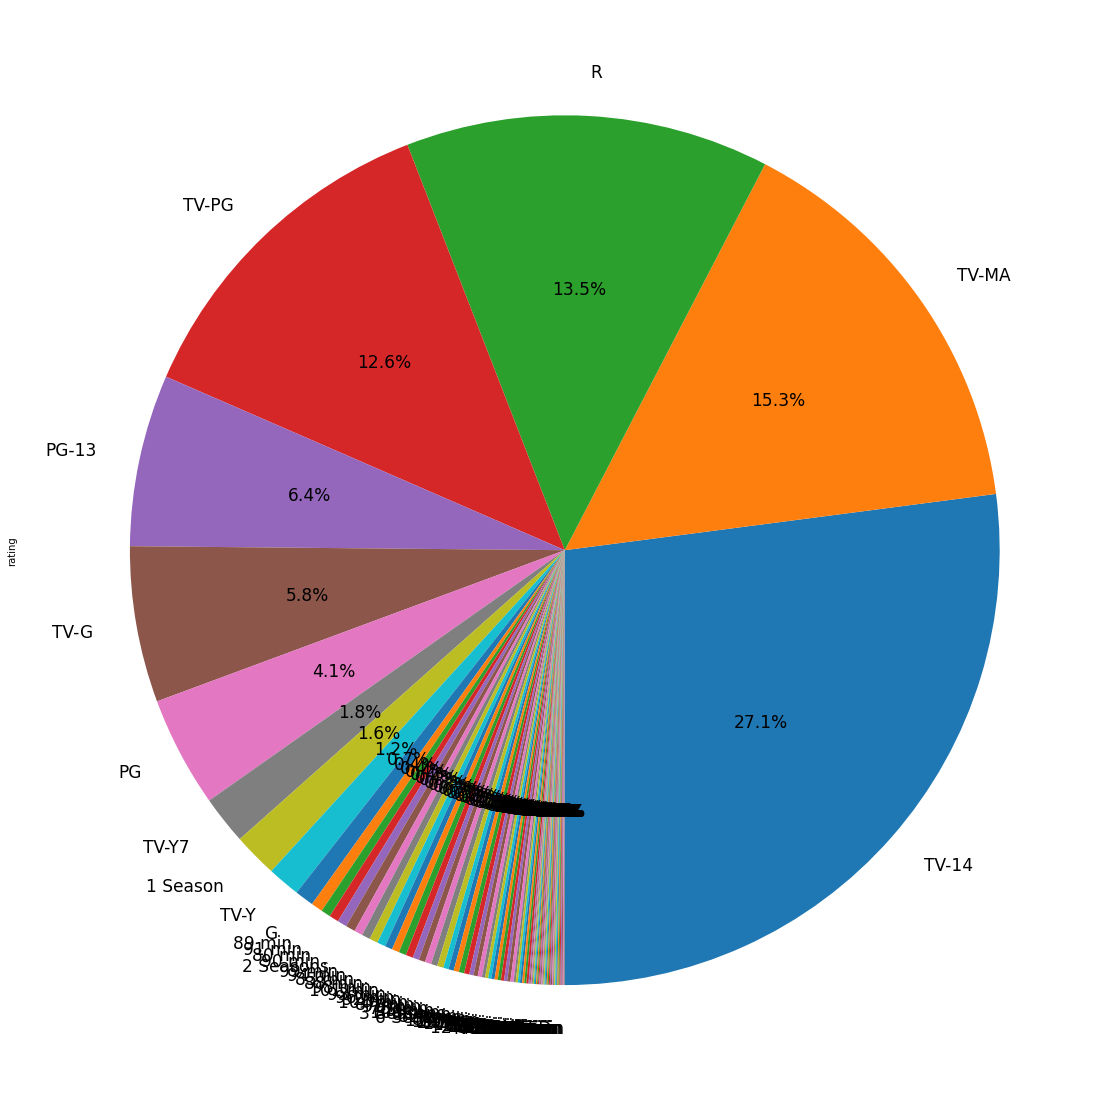

In [48]:
## Pie chart showing ratings on Hulu

plt.figure(figsize=(20,20))
hulu_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

In [49]:
## Ratings & Counts of movies & tv shows on Disney Plus

disney_ratings = disney_df.rating.value_counts()
disney_ratings

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

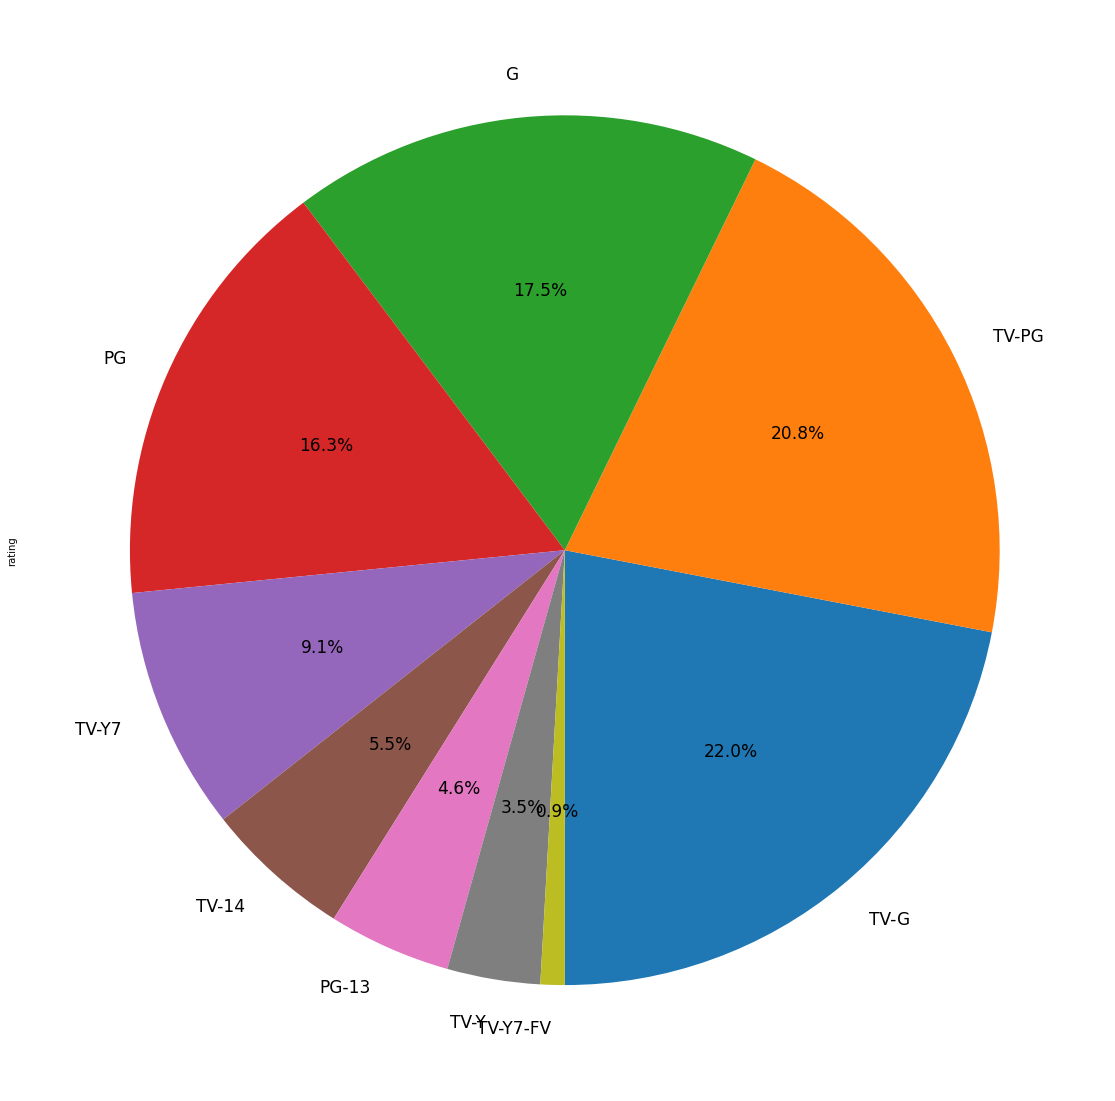

In [50]:
## Pie chart showing ratings on Disney Plus

plt.figure(figsize=(20,20))
disney_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

<AxesSubplot:>

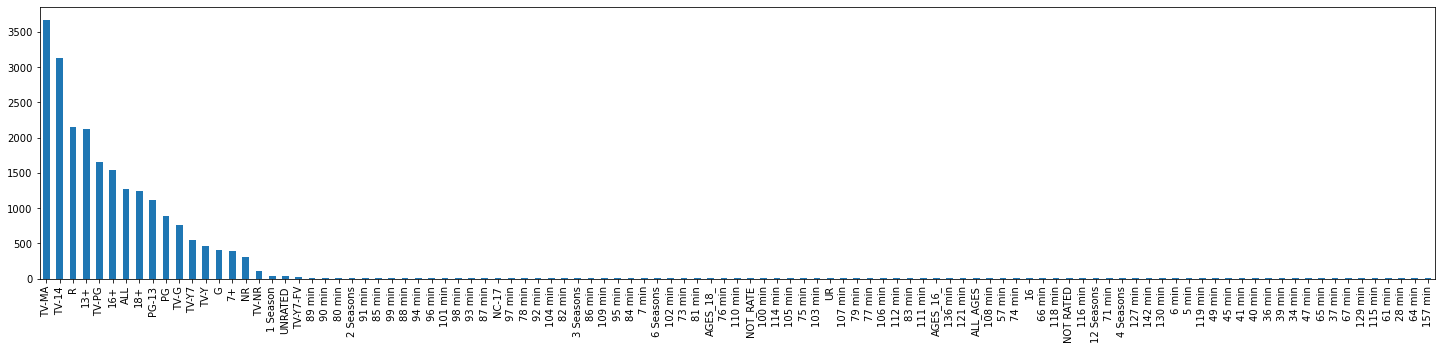

In [51]:
## Bar-graph showing Overall ratings counts

plt.figure(figsize=(25,5))
final_df.rating.value_counts().plot(kind='bar')

### Duration
    Duration column Analysis.

In [52]:
## Duration & Counts of movies & tv shows on Netflix

netflix_duration = netflix_df.duration.value_counts()
netflix_duration

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

<AxesSubplot:>

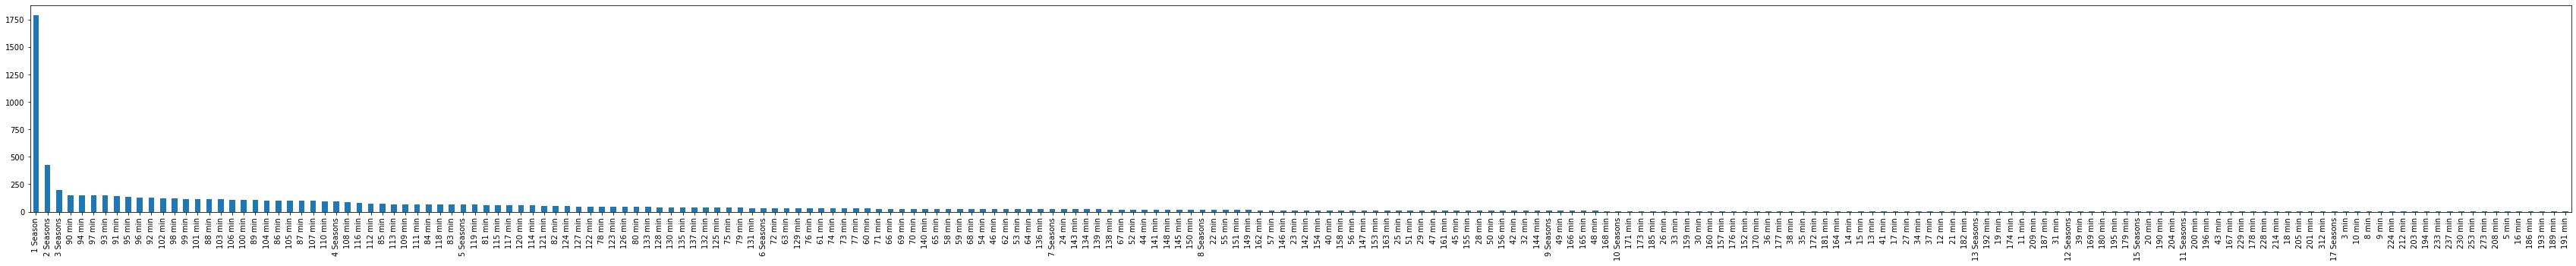

In [53]:
## Bar-graph showing Netflix Duration

plt.figure(figsize=(60,5))
netflix_duration.plot(kind='bar')

In [54]:
## Duration & Counts of movies & tv shows on Amazon Prime

amazon_duration = amazon_df.duration.value_counts()
amazon_duration

1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: duration, Length: 219, dtype: int64

<AxesSubplot:>

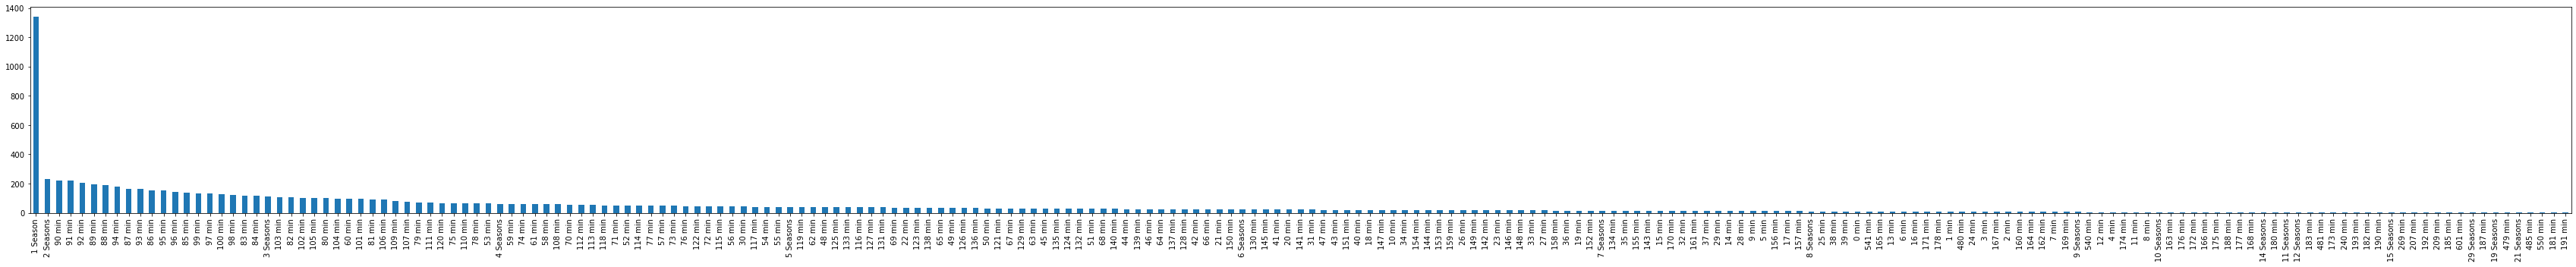

In [55]:
## Bar-graph showing Amazon Prime's Duration

plt.figure(figsize=(60,5))
amazon_duration.plot(kind='bar')

In [56]:
## Duration & Counts of movies & tv shows on Hulu

hulu_duration = hulu_df.duration.value_counts()
hulu_duration

1 Season      829
2 Seasons     265
3 Seasons     121
4 Seasons      99
5 Seasons      80
             ... 
19 Seasons      1
30 Seasons      1
149 min         1
52 min          1
26 Seasons      1
Name: duration, Length: 135, dtype: int64

<AxesSubplot:>

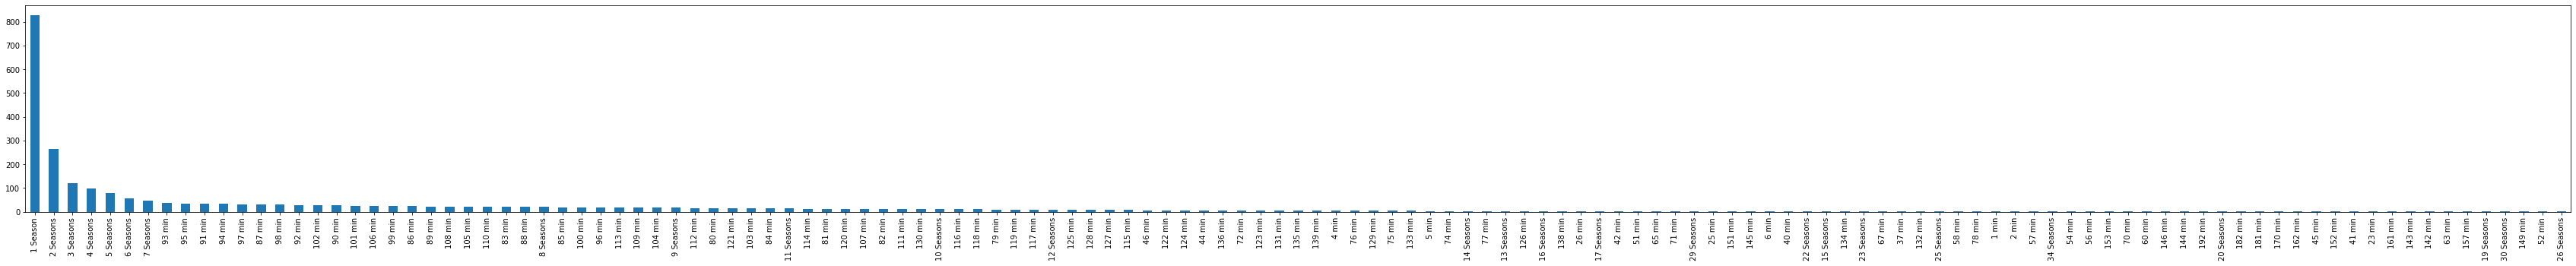

In [57]:
## Bar-graph showing duration

plt.figure(figsize=(60,5))
hulu_duration.plot(kind='bar')

In [58]:
## Duration & Counts of movies & tv shows on Disney Plus

disney_duration = disney_df.duration.value_counts()
disney_duration

1 Season     219
2 Seasons     82
3 Seasons     45
44 min        42
7 min         42
            ... 
120 min        1
56 min         1
19 min         1
30 min         1
68 min         1
Name: duration, Length: 158, dtype: int64

<AxesSubplot:>

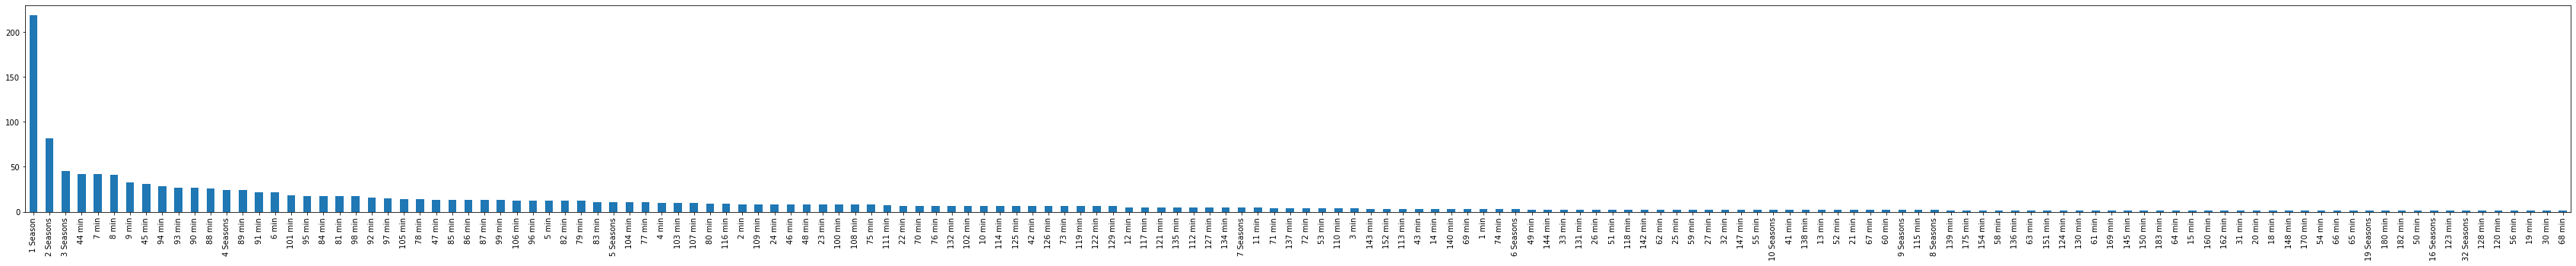

In [59]:
##### Bar-graph showing Duration on Disney Plus

plt.figure(figsize=(60,5))
disney_duration.plot(kind='bar')

In [60]:
## Duration & Counts of movies & tv shows across all Services

final_duration = final_df.duration.value_counts()
final_duration

1 Season      4183
2 Seasons     1001
3 Seasons      475
90 min         429
91 min         419
              ... 
230 min          1
25 Seasons       1
214 min          1
233 min          1
269 min          1
Name: duration, Length: 253, dtype: int64

<AxesSubplot:>

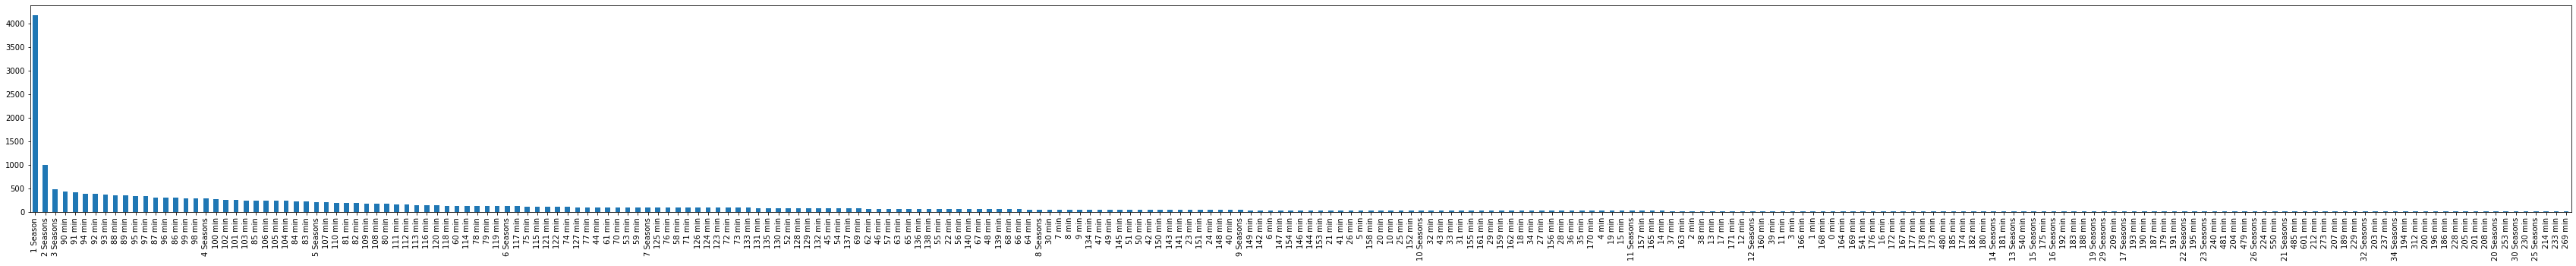

In [61]:
##### Bar-graph showing Duration across all services

plt.figure(figsize=(60,5))
final_duration.plot(kind='bar')

### Category
    Category column Analysis.

In [62]:
## Categories & Count of Movies & TV Shows

pd.DataFrame(final_df2.Category.value_counts())

,Category
Drama,202008
International Movies,199424
Action,168112
Comedy,162336
Drama,157320
...,...
TV Sci-Fi & Fantasy,76
Dance,76
Game Show / Competition,76
Sports Movies,76


<AxesSubplot:>

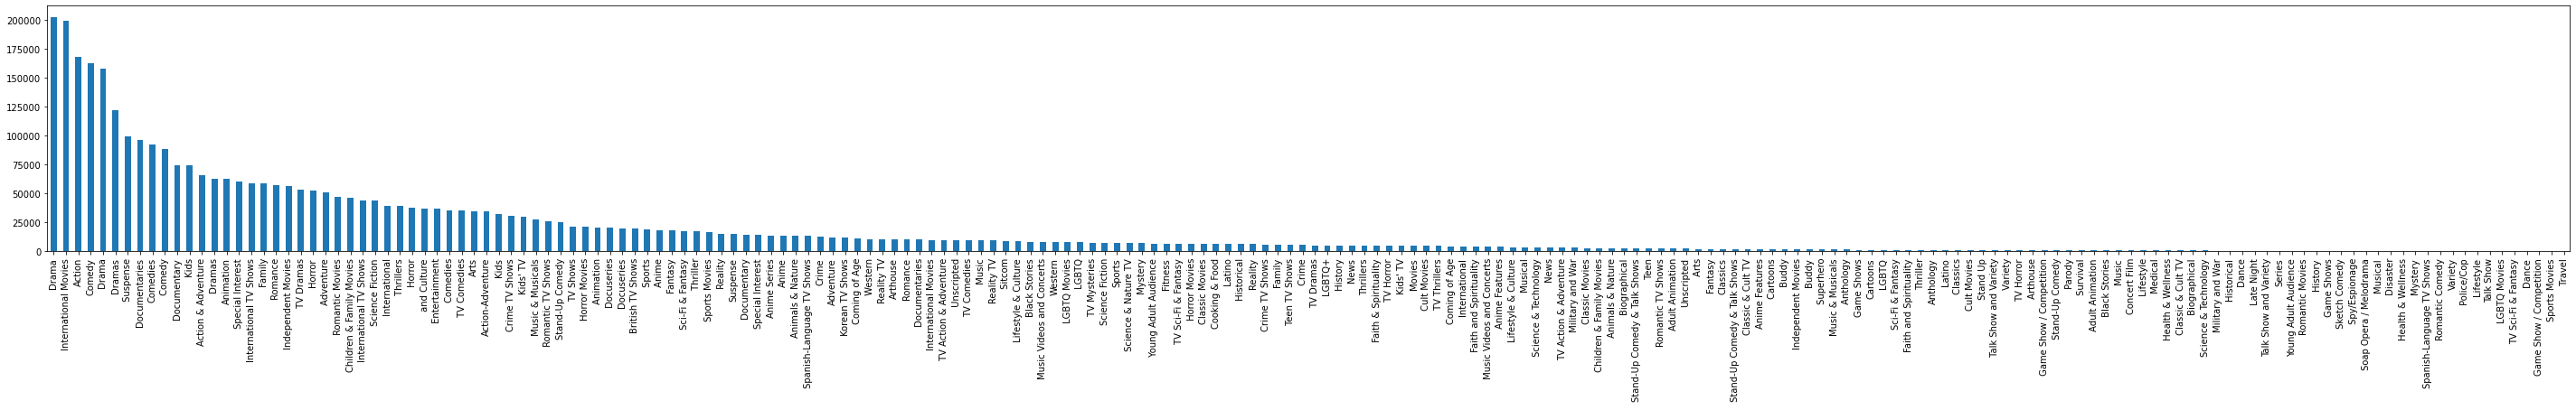

In [63]:
## Bar-graph showing count of movies & tv shows in each category 

plt.figure(figsize=(50,5))
final_df2.Category.value_counts().plot(kind='bar')

In [64]:
## Analyzing Cast Column with Type (Movie or TV Show)

bytype = final_df2.groupby('type').Cast.value_counts(normalize=True)
bytype.unstack().T.sort_values(by=['Movie', 'TV Show'], ascending=False)

type,Movie,TV Show
Anupam Kher,0.000633,0.000036
Maggie Binkley,0.000633,0.000036
Nassar,0.000495,0.000000
Paresh Rawal,0.000403,0.000000
Shah Rukh Khan,0.000403,0.000000
...,...,...
İbrahim Çelikkol,0.000000,0.000036
Şükrü Özyıldız,0.000000,0.000036
アンドレ･ロビンソン,0.000000,0.000036
マティアス・シュヴァイクヘーファー,0.000000,0.000036


In [65]:
## Analyzing Ratings vs Country

byrating = final_df.groupby('rating').country.value_counts(normalize=True)
byrating.unstack().T

rating,1 Season,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,,,,,,,,
", France, Algeria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
", South Korea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000315,NaN,NaN,NaN,NaN,NaN
"Afghanistan, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Afghanistan, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000955,0.002854,0.007286,0.012291,0.002521,0.007273,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Venezuela, Colombia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.001223,0.001821,0.000945,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='rating'>

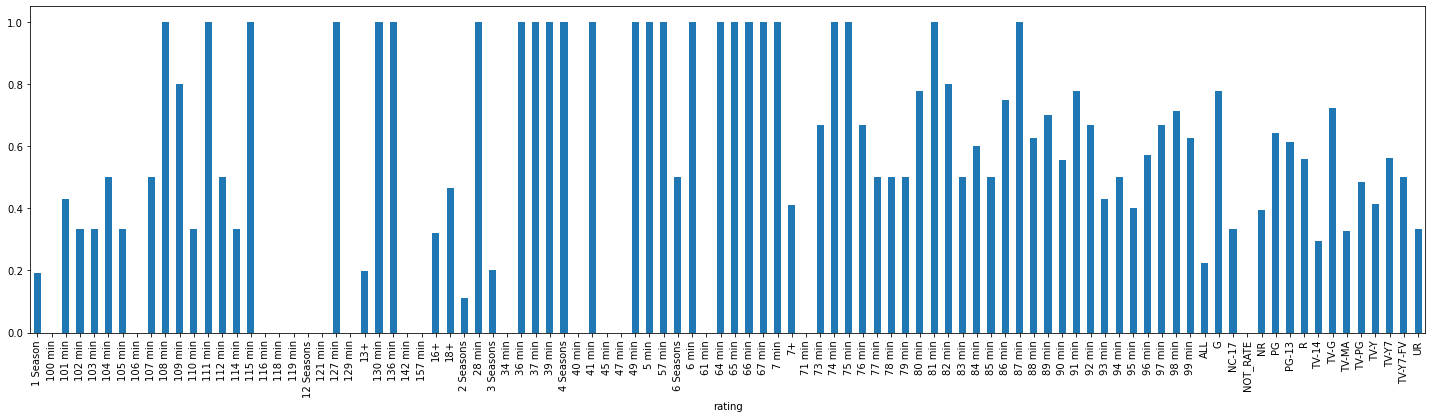

In [66]:
## Bar-graph showing Ratings of United States

plt.figure(figsize=(25,6))
byrating.unstack()['United States'].plot(kind='bar')

In [67]:
## Analyzing Type vs Ratings

bytype = final_df.groupby('type').rating.value_counts(normalize=True)
bytype.unstack().T

type,Movie,TV Show
rating,,
1 Season,0.002649,NaN
100 min,0.000189,NaN
101 min,0.000441,NaN
102 min,0.000189,NaN
103 min,0.000189,NaN
...,...,...
TV-Y,0.008829,0.051298
TV-Y7,0.011288,0.059105
TV-Y7-FV,0.000757,0.001115


<AxesSubplot:xlabel='type'>

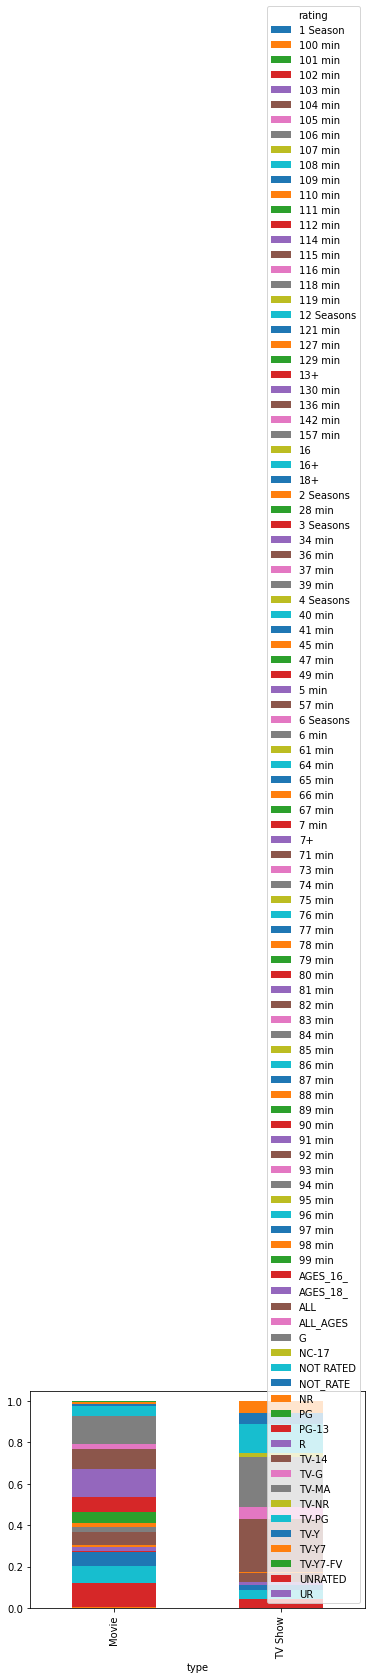

In [68]:
## Rating - Type (Movie or TV Show) Bar Graph

bytype.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:ylabel='Movie'>

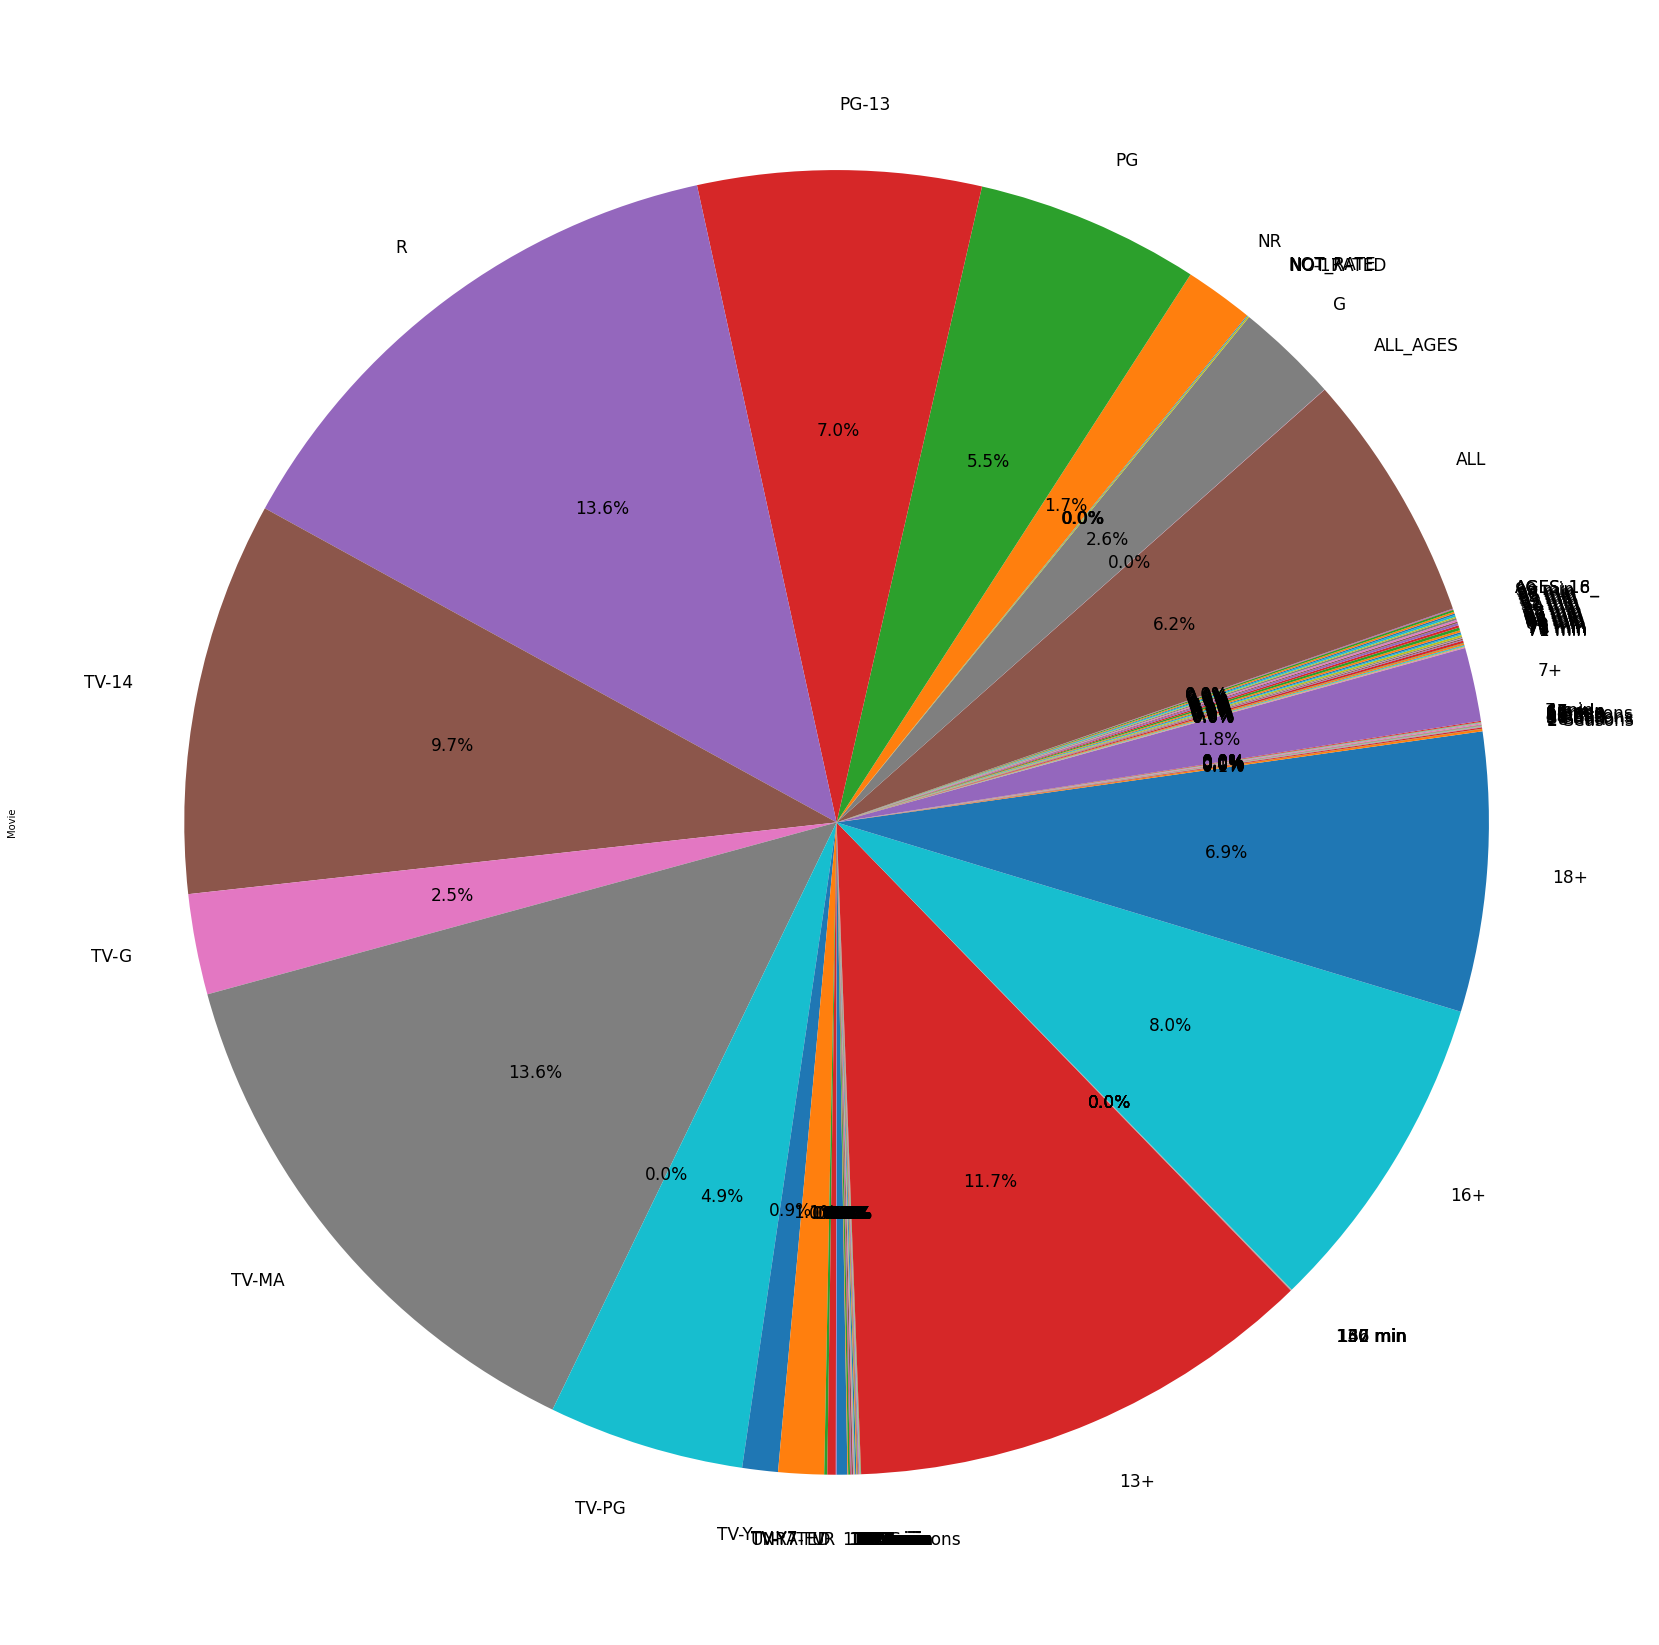

In [69]:
## Movie - Rating Pie Chart

plt.figure(figsize=(30,30))
bytype.unstack().T['Movie'].plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

<AxesSubplot:ylabel='TV Show'>

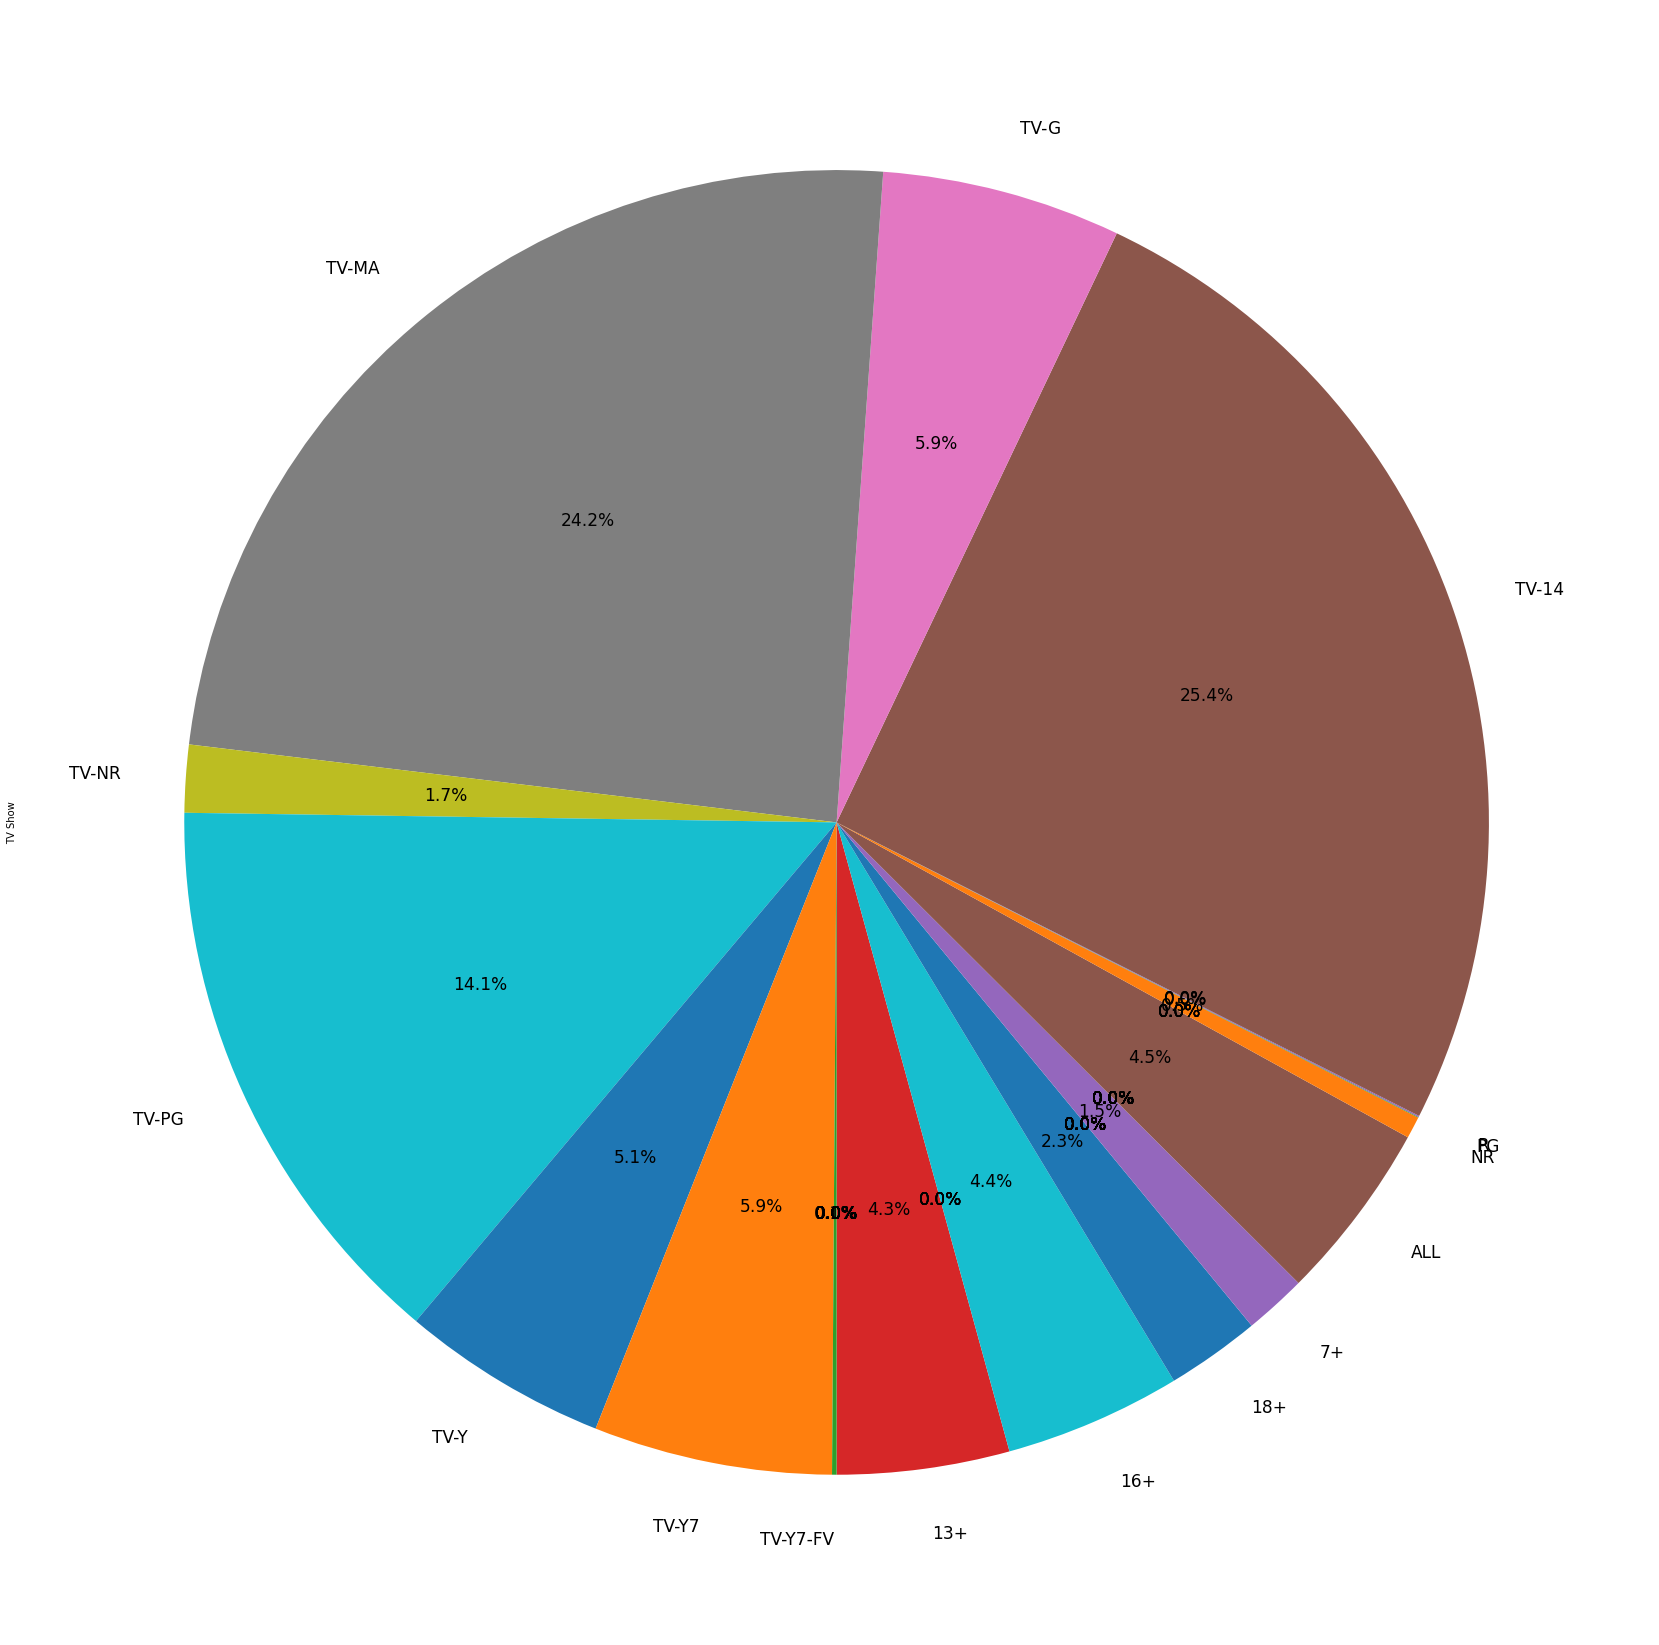

In [70]:
## TV Show - Rating Pie Chart

plt.figure(figsize=(30,30))
bytype.unstack().T['TV Show'].plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

In [71]:
## Analyzing Category vs Ratings

bycategory = final_df2.groupby('Category').rating.value_counts(normalize=True)
bycategory.unstack()

,1 Season,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,...,TV-14,TV-G,TV-MA,TV-NR,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UNRATED,UR
Category,,,,,,,,,,,,,,,,,,,,,
Adult Animation,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.250000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Adventure,0.013953,0.0,0.003101,0.0,0.00155,0.00155,0.0,0.0,0.0,0.0,...,0.213953,0.015504,0.111628,0.003101,0.079070,0.012403,0.029457,0.000000,0.003101,0.0
Animals & Nature,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.142857,0.057143,0.000000,0.000000,0.342857,0.000000,0.000000,0.000000,0.000000,0.0
Animation,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.003704,0.092593,0.003704,0.000000,0.022222,0.062963,0.296296,0.033333,0.000000,0.0
Anime,0.029787,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.425532,0.004255,0.276596,0.000000,0.063830,0.004255,0.089362,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thrillers,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.307692,0.000000,0.107692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Unscripted,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.172414,0.344828,0.000000,0.034483,0.137931,0.000000,0.000000,0.000000,0.000000,0.0
Variety,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<AxesSubplot:ylabel='International Movies'>

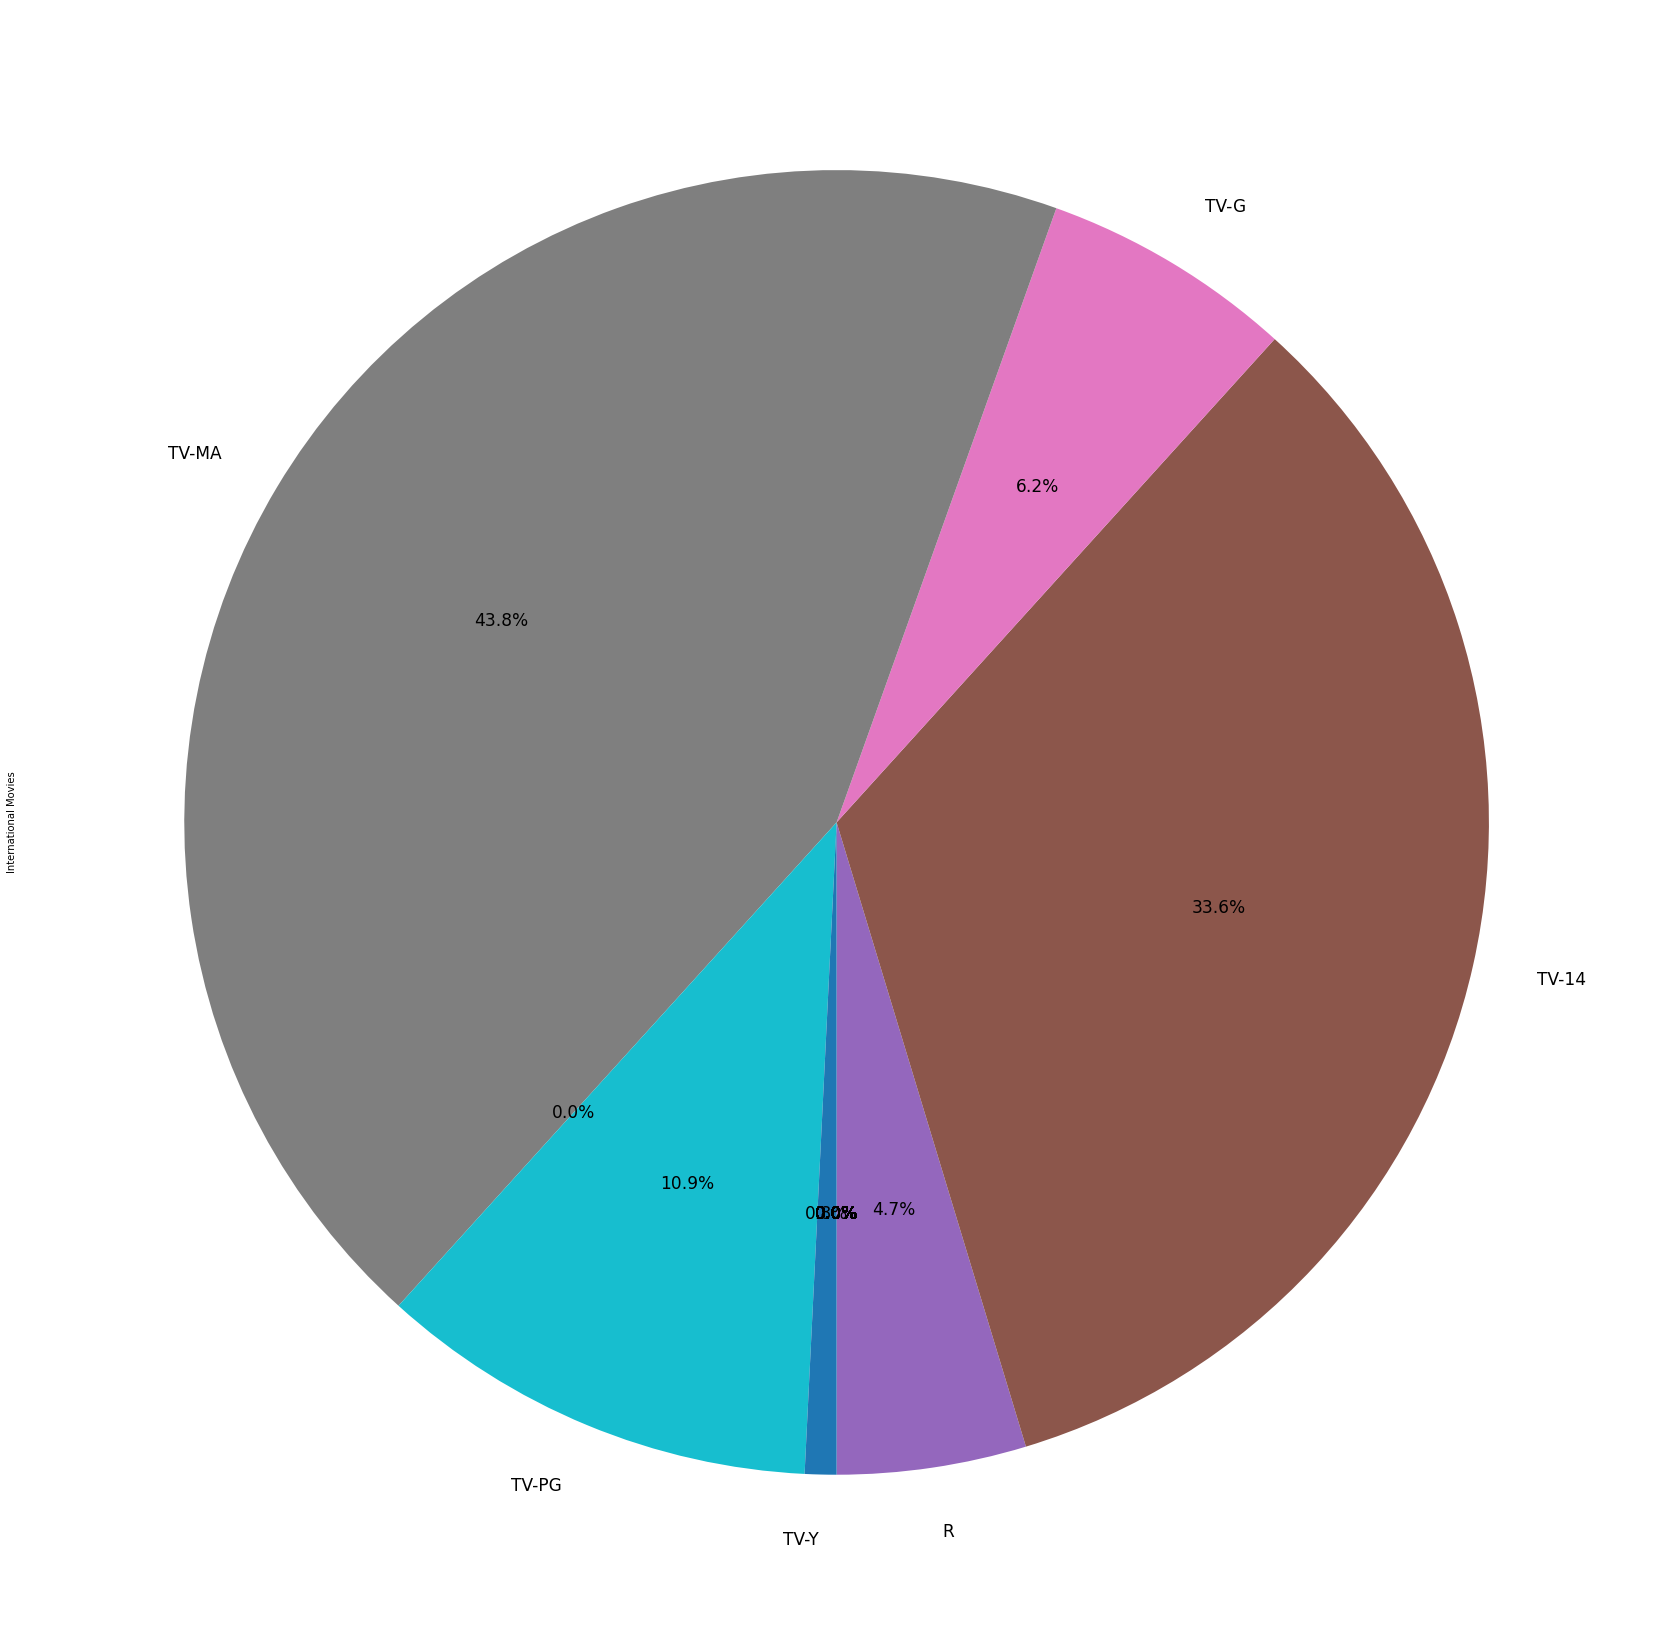

In [72]:
## International Movies - Rating Pie Chart

plt.figure(figsize=(30,30))
bycategory.unstack().T['International Movies'].plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

<AxesSubplot:ylabel='Dramas'>

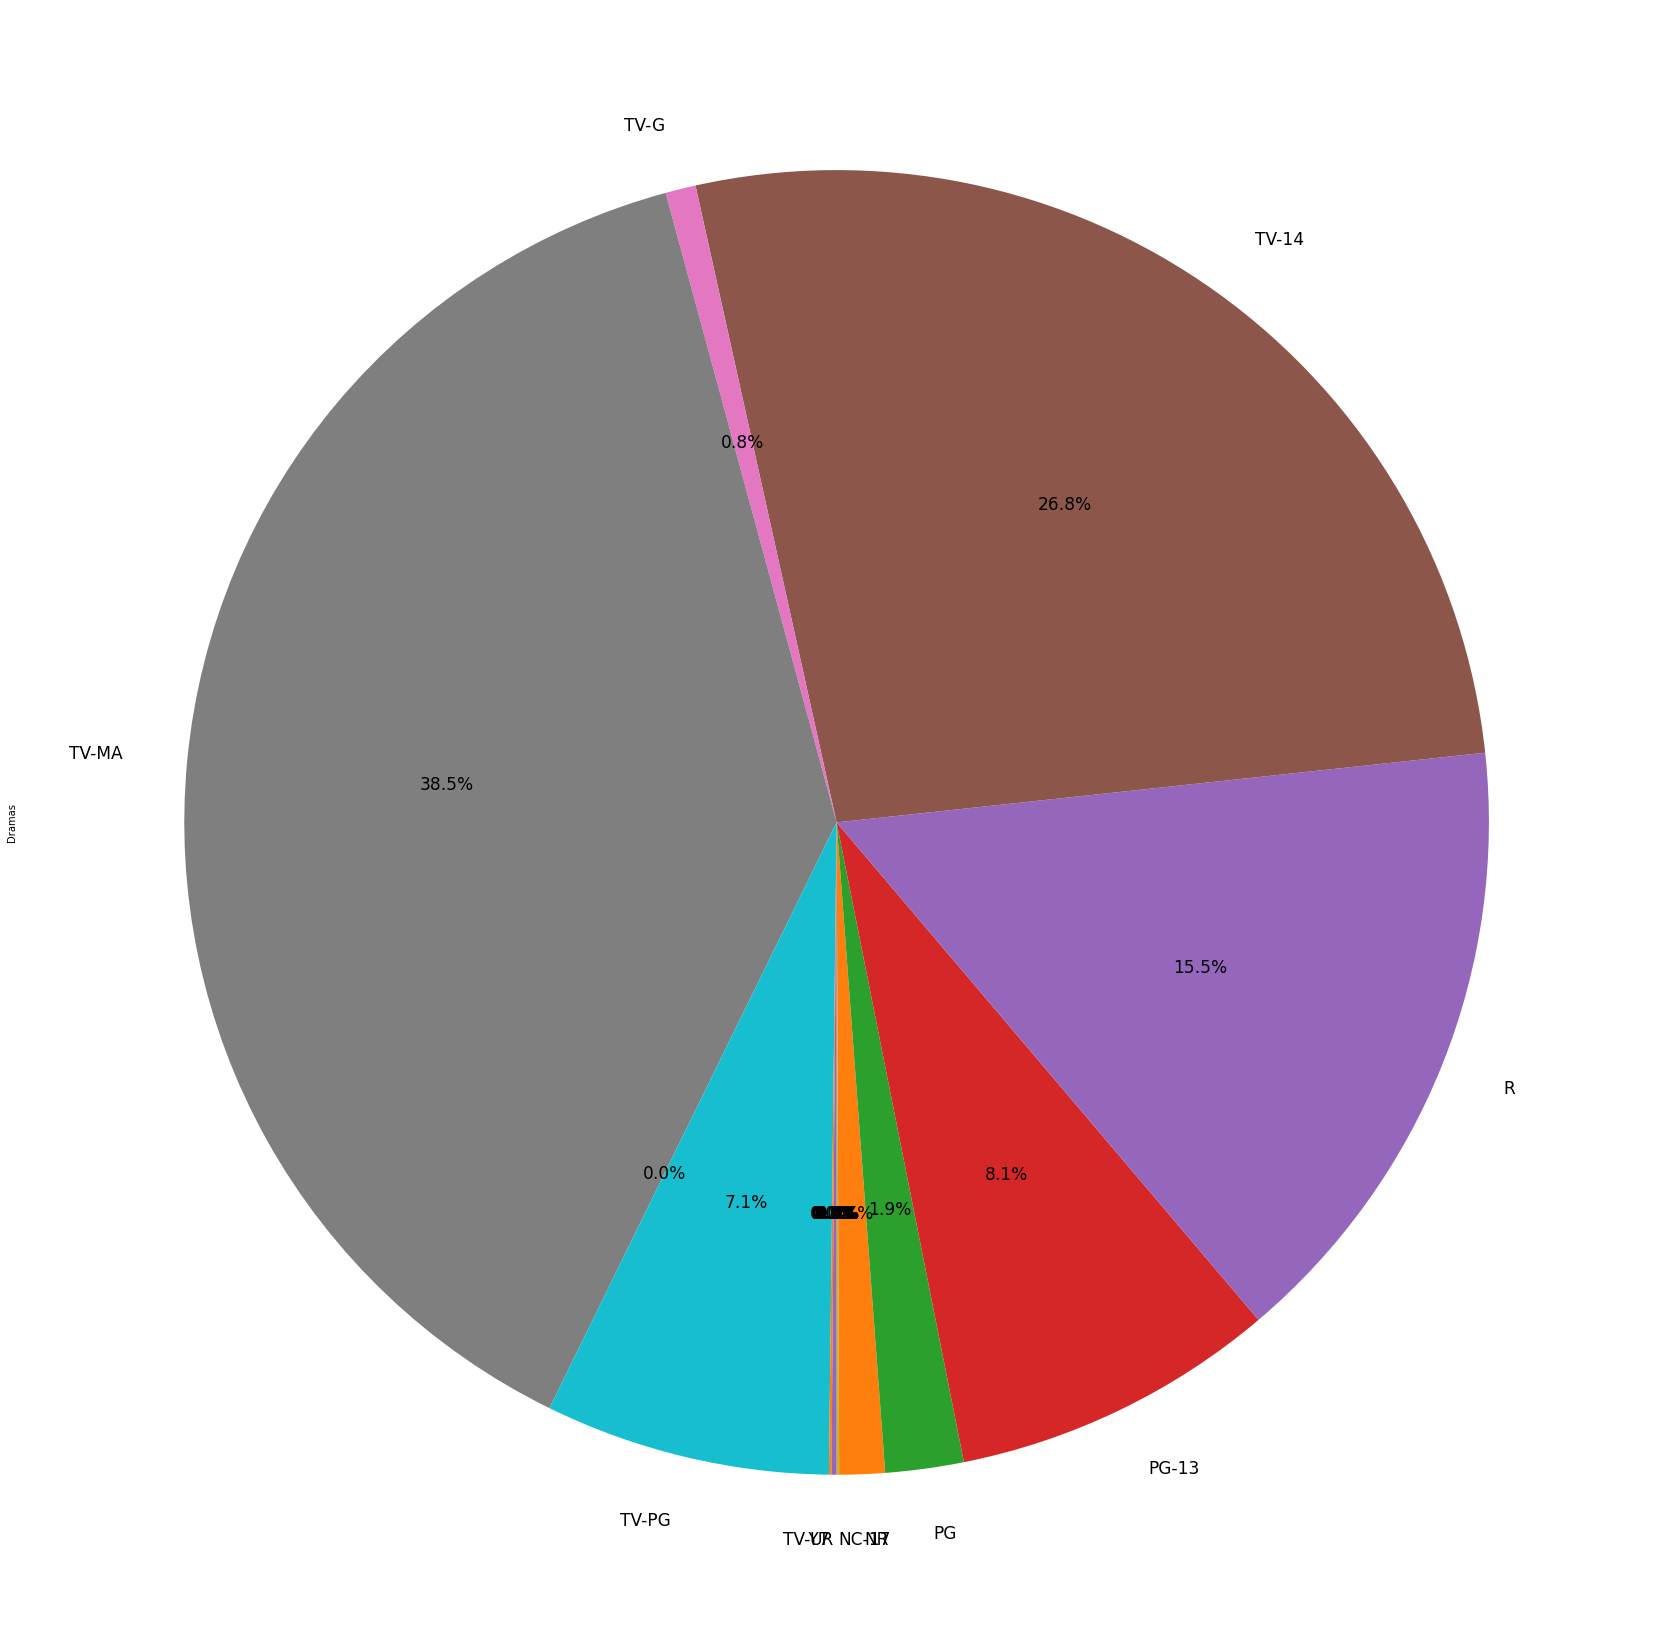

In [73]:
## Dramas - Rating Pie Chart

plt.figure(figsize=(30,30))
bycategory.unstack().T['Dramas'].plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)